ENTREGA FINAL

Importación de librerías

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Lectura del DatSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/job_postings.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN


# OBJETIVO ANALÍTICO Y CONTEXTO

### Definición de objetivo
Se tiene la intención de entrenar un algoritmo para detectar cuáles son los factores que influyen en la med_salary. El objetivo es predecir la variable med_salary basándose en diferentes características. Se utilizará un data set que contiene 27 variables asociadas a Linkedln con propiedades de la composición del mercado laboral formal.

### Contexto
Se tiene un dataset con registros de puestos laborales publicados en la plataforma Linkedln. La idea es determinar qué características se deben tener en cuenta para predecir la variable objetivo. Este modelo puede ser utilizado para tener información precisa sobre el salario en relación al puesto laboral.

### Información del dataset
•	Registro de puestos laborales publicados en el año 2023 en la plataforma Linkedln.  
•	Variables del data set describen los puestos laborales, la cantidad de visualizaciones, aplicaciones, lugar de trabajo y sponsoreos, entre otras.



## ABC - Análisis del dataset

TAMAÑO DEL DATASET

In [ ]:
df.shape

(15886, 27)

METADATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   description                 15885 non-null  object 
 4   max_salary                  5521 non-null   float64
 5   med_salary                  981 non-null    float64
 6   min_salary                  5521 non-null   float64
 7   pay_period                  6502 non-null   object 
 8   formatted_work_type         15886 non-null  object 
 9   location                    15886 non-null  object 
 10  applies                     8700 non-null   float64
 11  original_listed_time        15886 non-null  float64
 12  remote_allowed              2340 non-null   float64
 13  views                       131

In [ ]:
df.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored
count,1.588600e+04,1.552000e+04,5.521000e+03,981.000000,5521.000000,8700.000000,1.588600e+04,2340.0,13123.000000,1.588600e+04,9.280000e+02,1.588600e+04,15886.000000
mean,3.691293e+09,1.084100e+07,8.833622e+04,41167.664404,62352.218073,22.833103,1.690000e+12,1.0,76.776575,1.700765e+12,1.690000e+12,1.690000e+12,0.289248
std,1.028617e+08,2.313688e+07,9.068282e+04,93682.094905,59487.692283,54.892826,0.000000e+00,0.0,167.459105,2.709377e+09,0.000000e+00,0.000000e+00,0.453428
min,8.500877e+07,1.009000e+03,1.000000e+01,10.000000,10.000000,1.000000,1.690000e+12,1.0,1.000000,1.690000e+12,1.690000e+12,1.690000e+12,0.000000
25%,3.693071e+09,1.301100e+04,4.800000e+01,18.000000,38.000000,2.000000,1.690000e+12,1.0,6.000000,1.700000e+12,1.690000e+12,1.690000e+12,0.000000
50%,3.697358e+09,2.777685e+05,8.200000e+04,26.000000,60000.000000,6.000000,1.690000e+12,1.0,25.000000,1.700000e+12,1.690000e+12,1.690000e+12,0.000000
75%,3.699413e+09,7.798499e+06,1.400000e+05,52000.000000,99000.000000,21.000000,1.690000e+12,1.0,78.000000,1.700000e+12,1.690000e+12,1.690000e+12,1.000000
max,3.701374e+09,9.856222e+07,1.300000e+06,998426.000000,800000.000000,1615.000000,1.690000e+12,1.0,5656.000000,1.710000e+12,1.690000e+12,1.690000e+12,1.000000


## VARIABLES DEL DATASET

In [ ]:
df.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

## Distinción entre variables categóricas y numéricas
### Para distinguirlas se analiza la información que anteriormente aportó el método df.info ()

VARIABLES CATEGÓRICAS --> object

* 2 title: puesto del trabajo
* 3 description: descripción del puesto de trabajo
* 7 pay_period: período de pago del salario (yearly, hourly, monthly)
* 8 formatted_work_type: tipo de trabajo (full-time, contract, part-time, temporary, intership, other, volunteer)
* 9 location: lugar de trabajo
* 14 job_posting_url: url a la oferta de empleo en una plataforma
* 15 application_url: url donde se pueden presentar las solicitudes
* 16 application_type: tipo de proceso de solicitud (offsiteapply, complexonsiteapply, simpleonsiteapply)  
* 19 formatted_experience_level: nivel de experiencia laboral (mid-senior level, entry level, associete, director, intership, executive)
* 20 skills_desc: descripción que detalla las habilidades requeridas para el trabajo
* 22 posting_domain: dominio del sitio web con aplicación
* 24 work_type: tipo de trabajo asociado al puesto de trabajo (full-time, contract, part-time, temporary, intership, other, volunteer)
* 25 currency: moneda en la que se proporciona el salario.
* 26 compensation_type: tipo de compensación por el trabajo

VARIABLES NUMÉRICAS --> float64 e inter64

* 0 job_id: el ID del trabajo tal
* 1 company_id:  identificador de la empresa asociada a la oferta de empleo (se asigna a empresas.csv)
* 4 max_salary: salario máximo
* 5 med_salary: salario medio            
* 6 min_salary: salario mínimo         
* 10 applies: números de solicitudes que se presentaron                        
* 11 original_listed_time: hora orginal que se postuló el trabajo  
* 12 remote_allowed: si el trabajo es remoto        
* 13 views: número de veces que se vieron las ofertas de empleo                                 
* 17 expiry: fecha u hora de caducidad de la oferta de empleo                      
* 18 closed_time: hora de cerrar la oferta de empleo          
* 21 listed_time: hora en la que se publicó el trabajo    
* 23 sponsored: si la oferta de empleo está patrocinada o promocionada                 

In [ ]:
numericas = df.select_dtypes(include=['int', 'float'])
numericas.columns

Index(['job_id', 'company_id', 'max_salary', 'med_salary', 'min_salary',
       'applies', 'original_listed_time', 'remote_allowed', 'views', 'expiry',
       'closed_time', 'listed_time', 'sponsored'],
      dtype='object')

In [ ]:
numericas.shape #hay 13 variables numércias

(15886, 13)

In [ ]:
categoricas = df.select_dtypes(include=['object'])
categoricas.columns

Index(['title', 'description', 'pay_period', 'formatted_work_type', 'location',
       'job_posting_url', 'application_url', 'application_type',
       'formatted_experience_level', 'skills_desc', 'posting_domain',
       'work_type', 'currency', 'compensation_type'],
      dtype='object')

In [ ]:
categoricas.shape #hay 14 variables categóricas

(15886, 14)

# EDA - Análisis Exploratorio de datos

## Hay alguna relación entre el salario y applies?

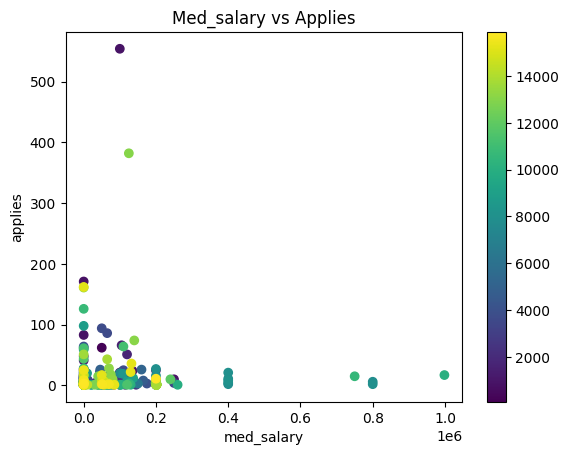

In [ ]:
fig, ax = plt.subplots()
mapeo_colores = ax.scatter(df['med_salary'], df['applies'], c=df.index)
fig.colorbar(mapeo_colores)
ax.set_title('Med_salary vs Applies')
ax.set_xlabel('med_salary')
ax.set_ylabel('applies')
ax.grid(False)
plt.show()

Basándome en la descripción de la imagen y el gráfico de dispersión, parece que no hay una relación lineal entre ‘med_salary’ y ‘applies’. Los puntos están distribuidos de manera bastante aleatoria, lo que indica una falta de dependencia fuerte entre las dos variables.
Esto quiere decir que no parece que un aumento de la variable ‘med_salary’ esté asociado sistemáticamente con un aumento en el número de solicitudes ‘applies’, ni viceversa. Esto sugiere que otros factores podrían estar influyendo en el número de solicitudes, o que la relación entre estas dos variables es más compleja y no puede ser capturada simplemente con una relación lineal.

## Hay alguna relación entre med_salary, views y expiry?



*   Gráfico de puntos o de dispersión con SeaBorn






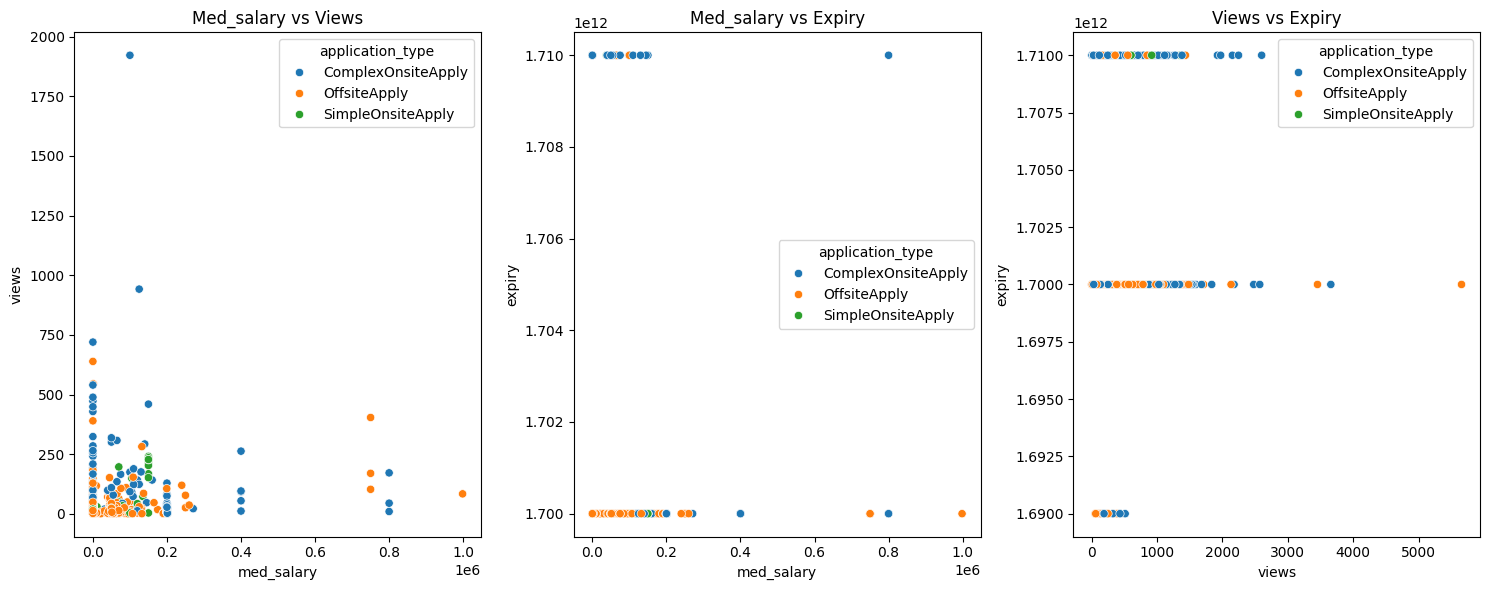

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw=dict(width_ratios=[3, 3, 3])) # seteo el lienzo

sns.scatterplot(data=df, x='med_salary', y='views', hue='application_type', ax=axs[0])
axs[0].set_title('Med_salary vs Views')
sns.scatterplot(data=df, x='med_salary', y='expiry', hue='application_type', ax=axs[1])
axs[1].set_title('Med_salary vs Expiry')
sns.scatterplot(data=df, x='views', y='expiry', hue='application_type', ax=axs[2])
axs[2].set_title('Views vs Expiry')
f.tight_layout()

plt.show()

1.	No parece haber una correlación clara entre ‘med_salary’ y ‘views’. Los puntos están dispersos sin mostrar un patrón distintivo. Esto sugiere que el número de veces que se ha visto la oferta de empleo no está necesariamente relacionado con el salario medio ofrecido.
2.	No hay una tendencia o correlación visible entre ‘med_salary’ y ‘expiry’. Esto podría indicar que la fecha u hora de caducidad de la oferta de empleo no está directamente relacionada con el salario medio ofrecido.
3.	Este gráfico tampoco muestra una relación clara entre ‘views’ y ‘expiry’. Los puntos están alineados horizontalmente, lo que indica que no hay una correlación significativa entre el número de vistas y la fecha de caducidad.
Por lo tanto, no parece haber una relación evidente entre ‘med_salary’, ‘views’ y ‘expiry’

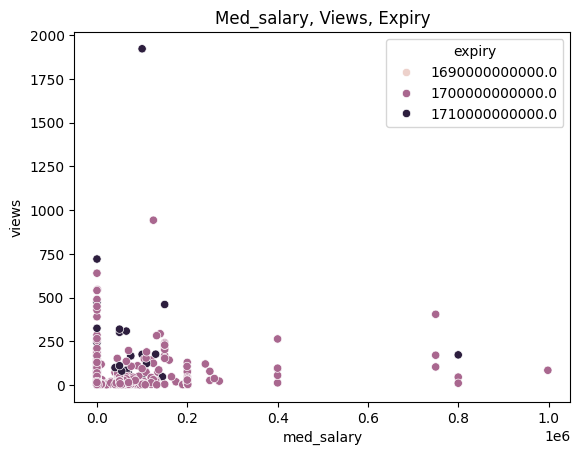

In [ ]:
ax = sns.scatterplot(data=df, x='med_salary', y='views', hue='expiry')
ax.grid(False)
ax.set_title('Med_salary, Views, Expiry')
plt.show()



1. Los trabajos con salarios más bajos son los menos vistos.
2. No se observa ninguna correlación clara entre expiry y med_salary y views.
3. Med_salary y views podrían tener alguna correlación, mientras que la variable expiry parece no estar relacionado de manera significativa con ninguna de las otras dos variables.





## Influye el work_type en la cantidad de applies?

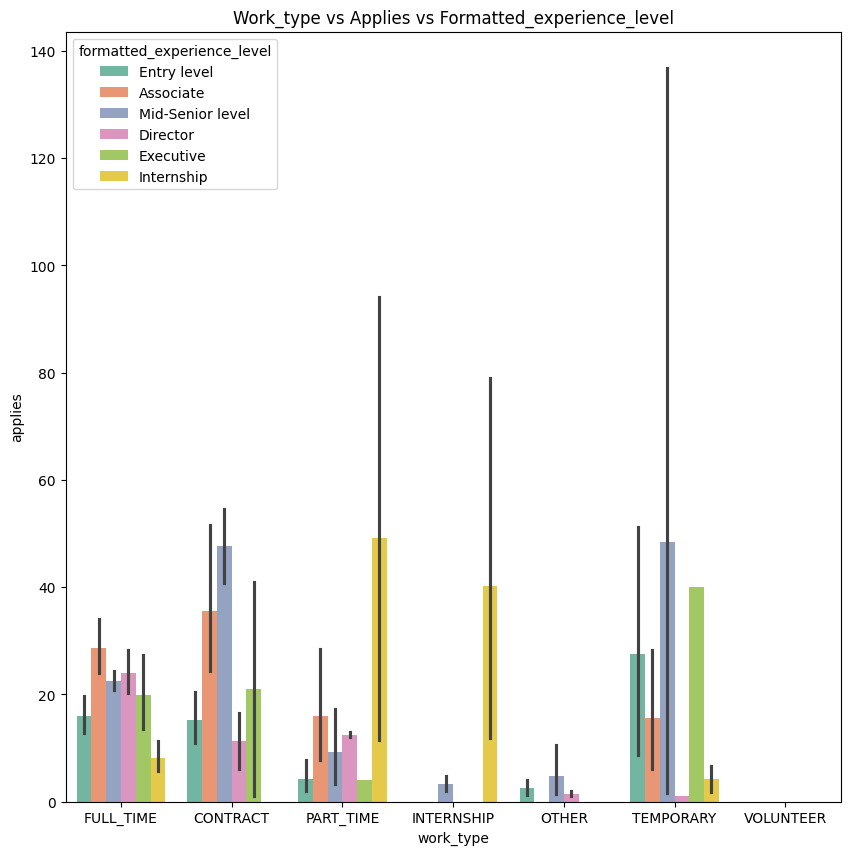

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y='applies', x= 'work_type', hue='formatted_experience_level', data=df, palette='Set2')
plt.title('Work_type vs Applies vs Formatted_experience_level')
plt.show()



1.   La variable work_type influye en la variable applies.
2.   El mayor número de applies se observa en el work_type full_time para el formatted_experience_level Mid-Senior.
3. El menor número de applies está en work_type volunteer para todos los formatted_experience_level.
4. Work_type y formatted_experience_level influyen en la cantidad de applies.




### Análisis de normalidad de las variables numéricas

#### Análisis
Se analiza en el método describe, en cada variable si la media es igual a la mediana, y se acompaña con graficos de las distribuciones.



DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS


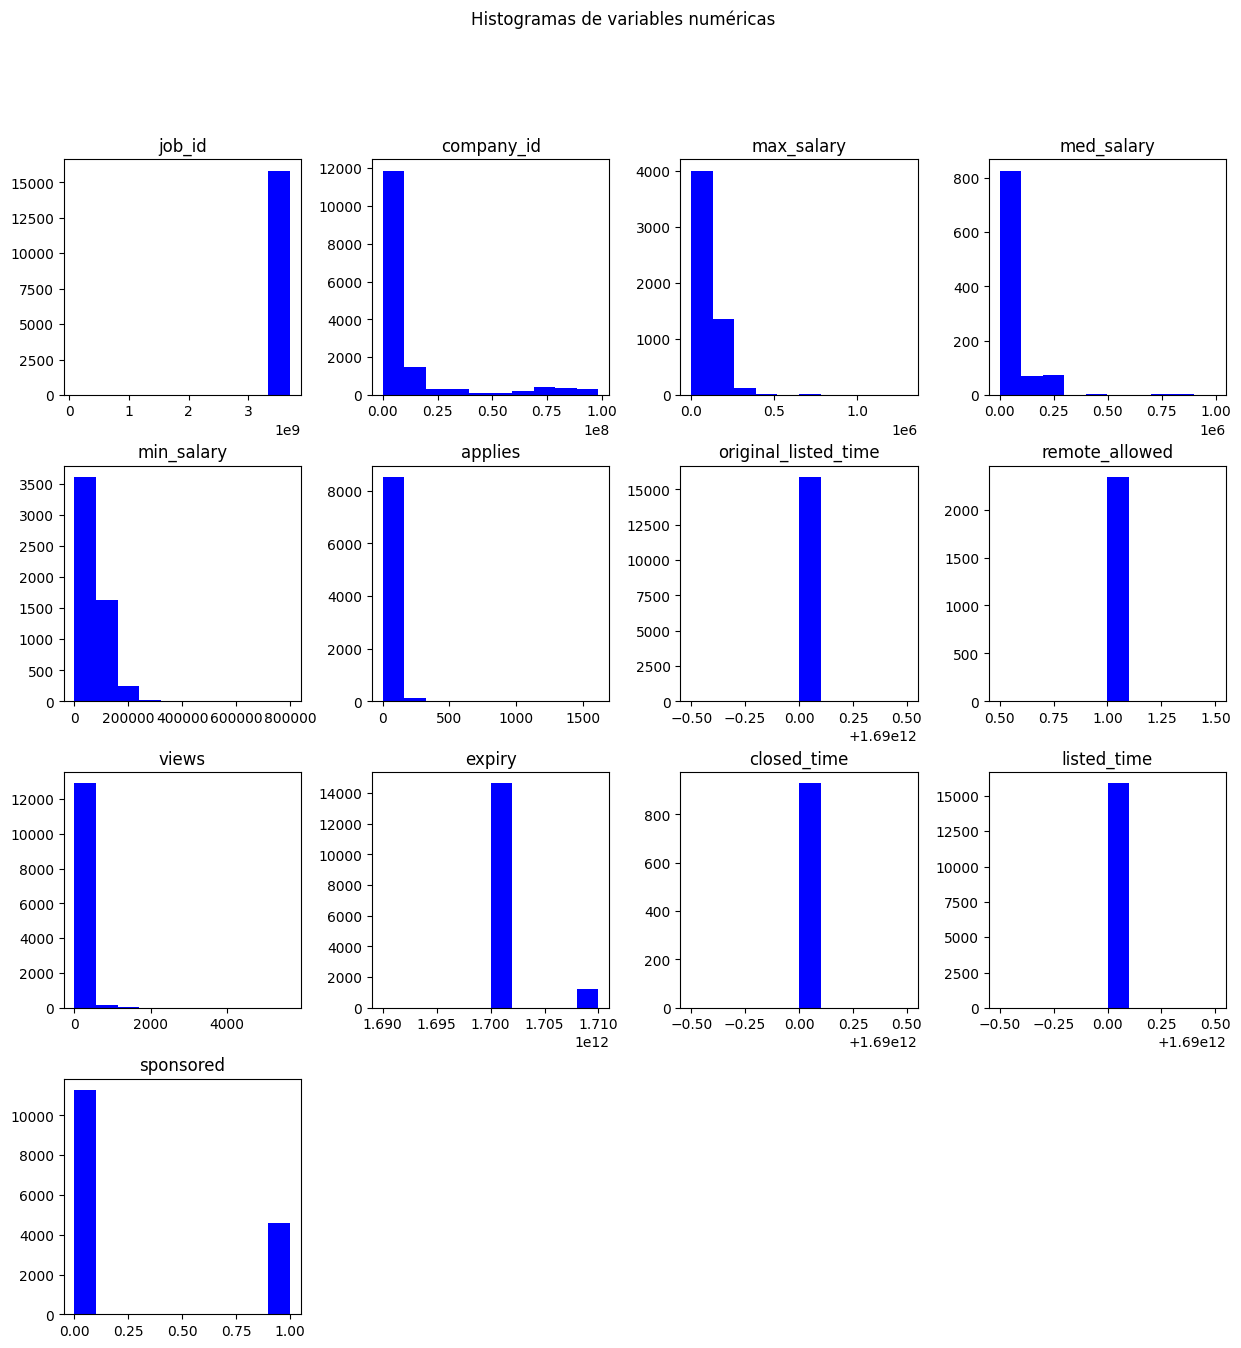

In [ ]:
df.hist(figsize=(15, 15), grid=False, color='blue')
plt.suptitle("Histogramas de variables numéricas ")
plt.show()

## Determinación de variables normales

Si la media y la mediana son muy parecidas quiere decir que la columna es normal o tiende a eso.

* job_id:  mean= 3.69;  50%= 3.70;  columna NORMAL

*	company_id : mean= 1,08.63;  50%= 2.78;  la media es menor a la mediana, la columna es NO NORMAL con un sesgo a la derecha,  esto quiere decir que la mayoría de los datos son bajos en valor, con una cola que se extiende hacia valores más altos.

*	max_salary: mean= 8.83; 50%= 8,20;  la media es mayor a la mediana, la columna es  NO NORMAL con un sesgo a la izquierda, esto quiere decir que la mayoría de los datos son altos en valor, con una cola que se extiende hacia valores más bajos.

*	med_salary: mean= 41.167; 50%= 26.000, la media es mayor a la mediana, la columna es NO NORMAL, con un sesgo a la izquierda.

*	min_salary: mean= 62.352; 50%= 60.000;  la media es mayor a la mediana, la columna es NO NORMAL, con un sesgo a la izquierda.

*	applies : mean= 22.833; 50%= 6.000, la media es menor a la mediana, la columna es NO NORMAL, con un sesgo a la derecha.

*	original_listed_time: mean= 1.69; 50%= 1.69; la media es igual a la mediana, la columna es NORMAL.

*	remote_allowed: mean= 1.0; 50%= 1.0; la columna es NORMAL.

*	views: mean= 76.776; 50%= 25.000; la media es mayor a la mediana, la columna es NO NORMAL, con un sesgo a la izquierda.

*	expiry: mean= 1,70; 50%= 1,70; la columna es NORMAL.

*	closed_time: mean= 1,69; 50%= 1,69; la columna es NORMAL.

*	listed_time: mean=1.69; 50%=1,69; la columna es NORMAL.

*	sponsored: mean= 0.28; 50%= 0.00, la columna  es NO NORMAL, con un sesgo a la izquierda.




### División en dos dataframes que luego van a servir para tratar outliers y nulos

In [ ]:
columnas_normales = ['job_id', 'original_listed_time', 'remote_allowed', 'expiry','closed_time', 'listed_time' ]
variables_normales = numericas [columnas_normales]
variables_normales.columns

Index(['job_id', 'original_listed_time', 'remote_allowed', 'expiry',
       'closed_time', 'listed_time'],
      dtype='object')

In [ ]:
variables_NO_normales = numericas.drop (columns= columnas_normales)
variables_NO_normales.columns

Index(['company_id', 'max_salary', 'med_salary', 'min_salary', 'applies',
       'views', 'sponsored'],
      dtype='object')

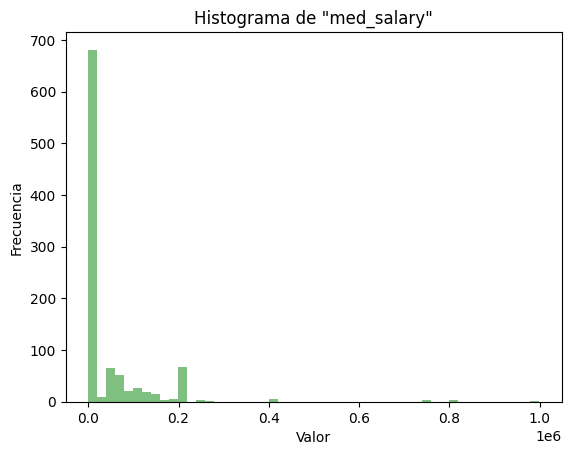

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos una distribución normal con la media y desviación estándar proporcionadas
np.random.seed(0)
data = df['med_salary']

# Creamos el histograma
plt.hist(data, bins=50, alpha=0.5, color='g')

# Añadimos títulos y etiquetas
plt.title('Histograma de "med_salary"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

In [ ]:
num_duplicados = df.duplicated().sum()
print("Número de filas duplicadas: ", num_duplicados)

Número de filas duplicadas:  0


## Visualización y tratamiento de datos nulos
Al observar la informacion que nos ofrece df.info() se puede visualizar que hay datos faltantes en algunas columnas.

Instalación de librerias de utilidad

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

## Visualización de datos nan y análisis
SUMA DE NULOS

In [ ]:
df.isnull().sum() #para cada columna, indico cuantos datos nulos Nan tiene

job_id                            0
company_id                      366
title                             0
description                       1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
dtype: int64

CANTIDAD DE NULOS POR COLUMNA

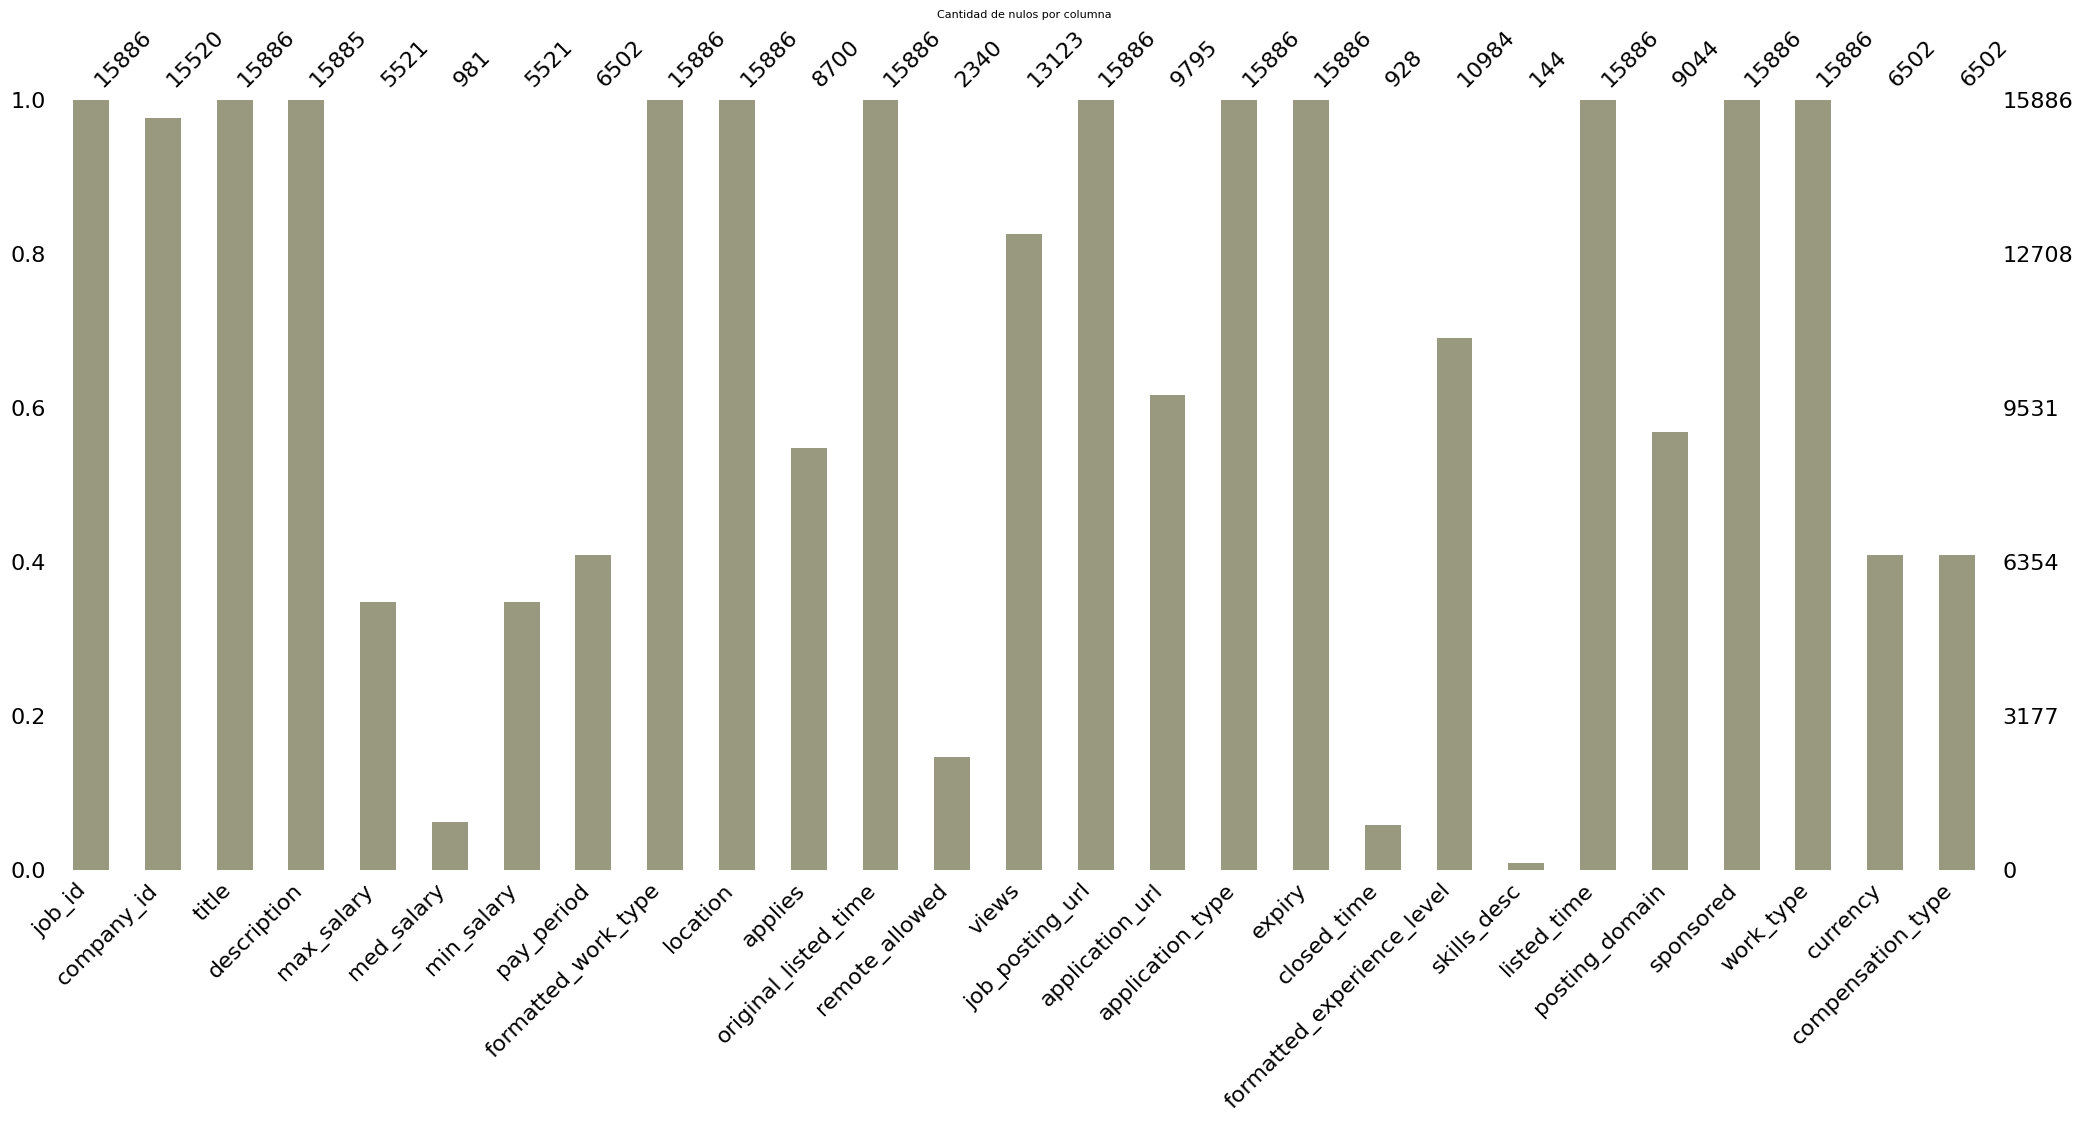

In [ ]:
msno.bar (df, color=(0.6, 0.6, 0.5))
plt.title ('Cantidad de nulos por columna', fontsize=8)
plt.show()

#Se observa la cantidad de datos que hay que rellenar y se toma la decision de todavía no eliminar ninguna columna

CANTIDAD DE NULOS EN VARIABLES NORMALES

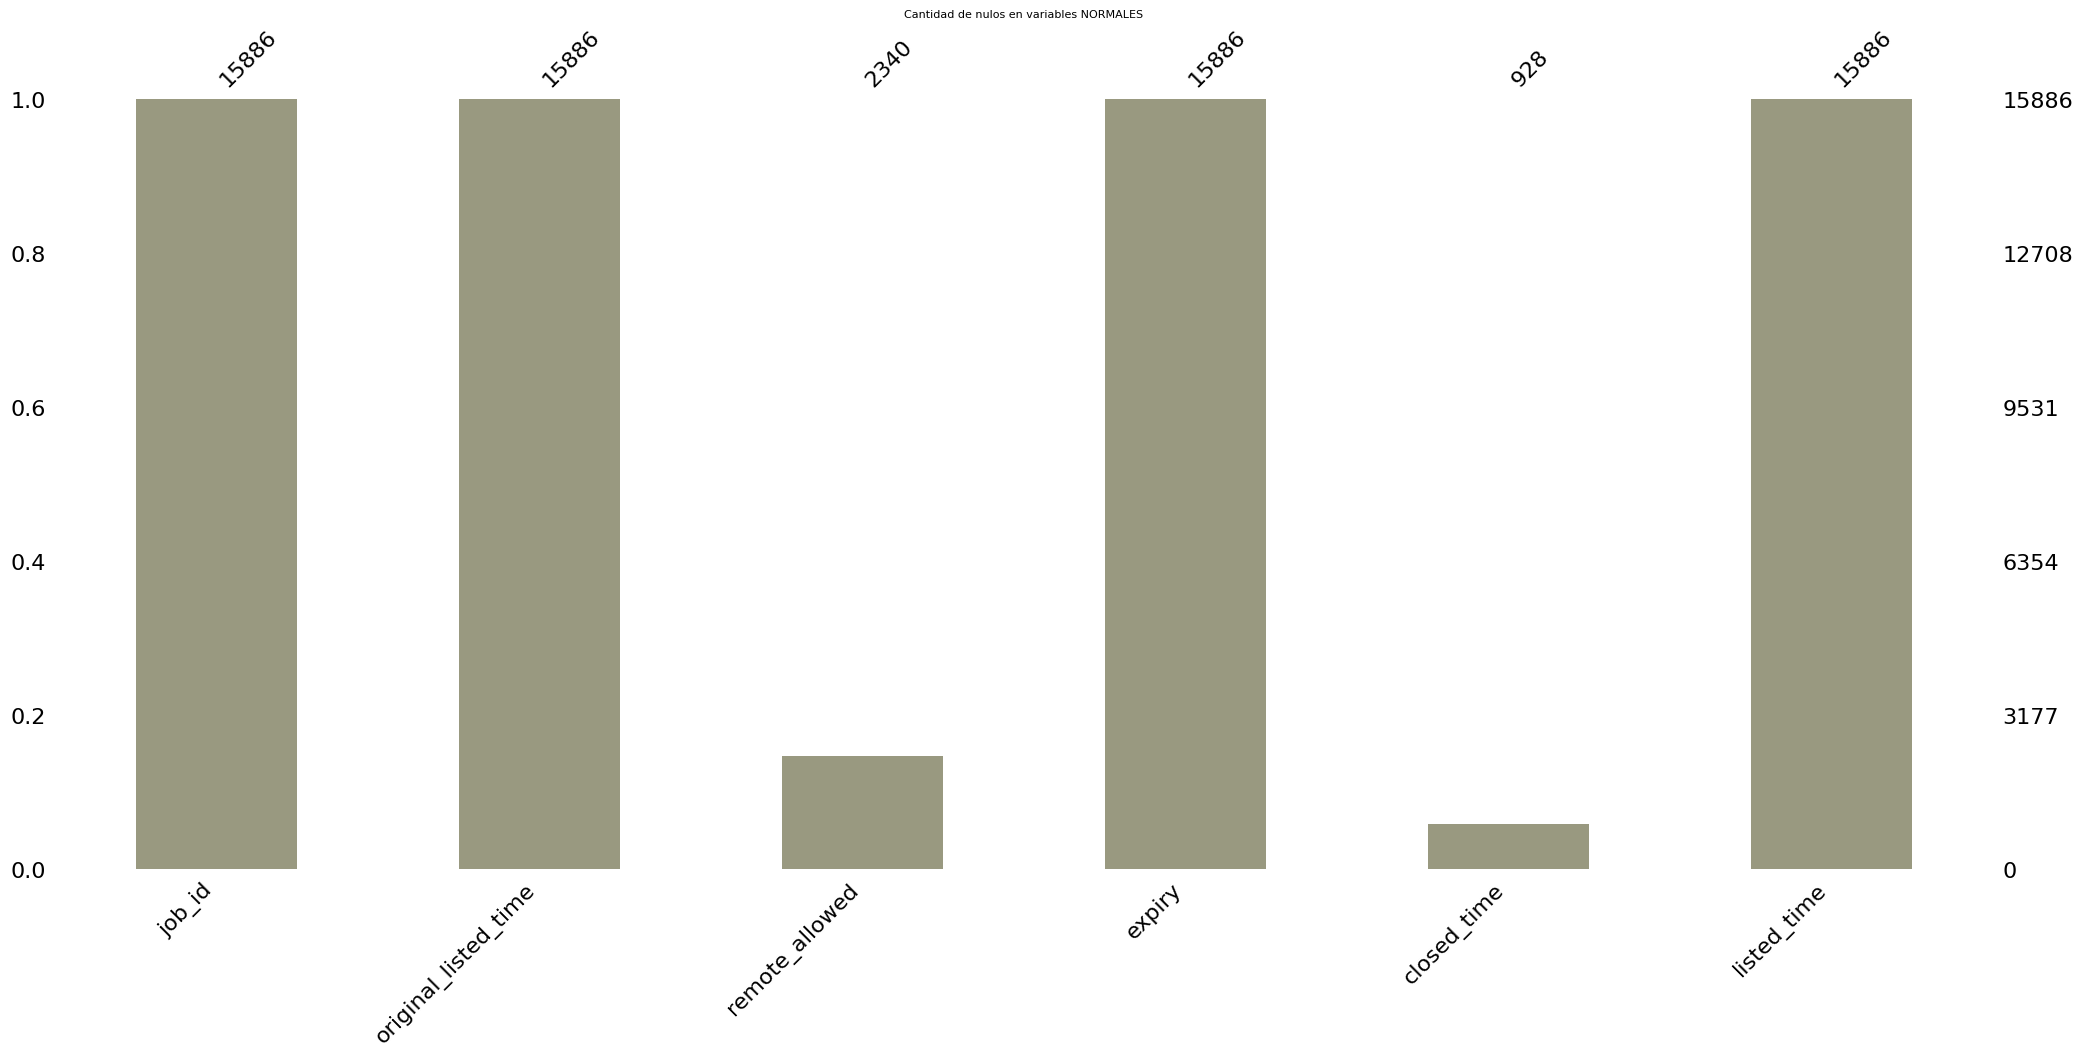

In [ ]:
msno.bar (variables_normales, color=(0.6, 0.6, 0.5)) #se observa que faltan dos datos en cada columna
plt.title ('Cantidad de nulos en variables NORMALES', fontsize=8)
plt.show()

CANTIDAD DE NULOS EN VARIABLES NO NORMALES

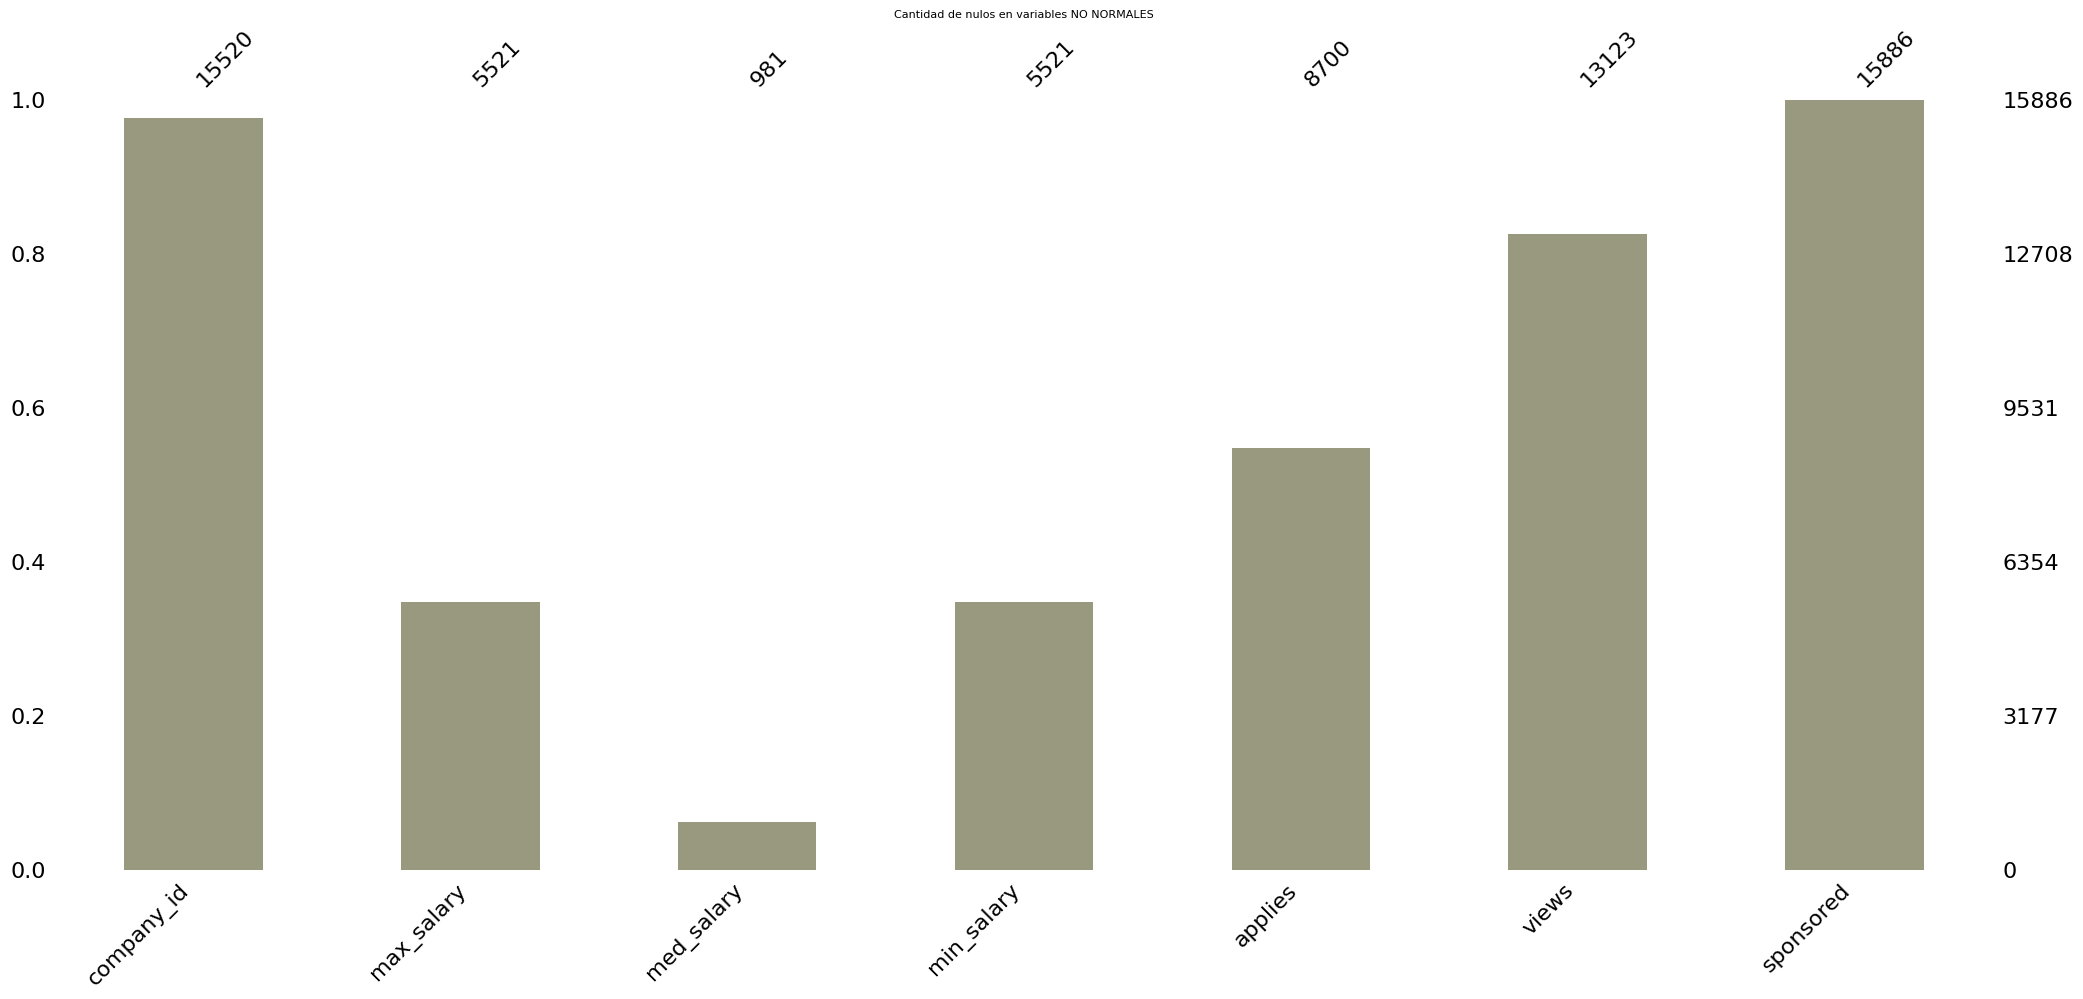

In [ ]:
msno.bar (variables_NO_normales, color=(0.6, 0.6, 0.5))
plt.title ('Cantidad de nulos en variables NO NORMALES', fontsize=8)
plt.show()

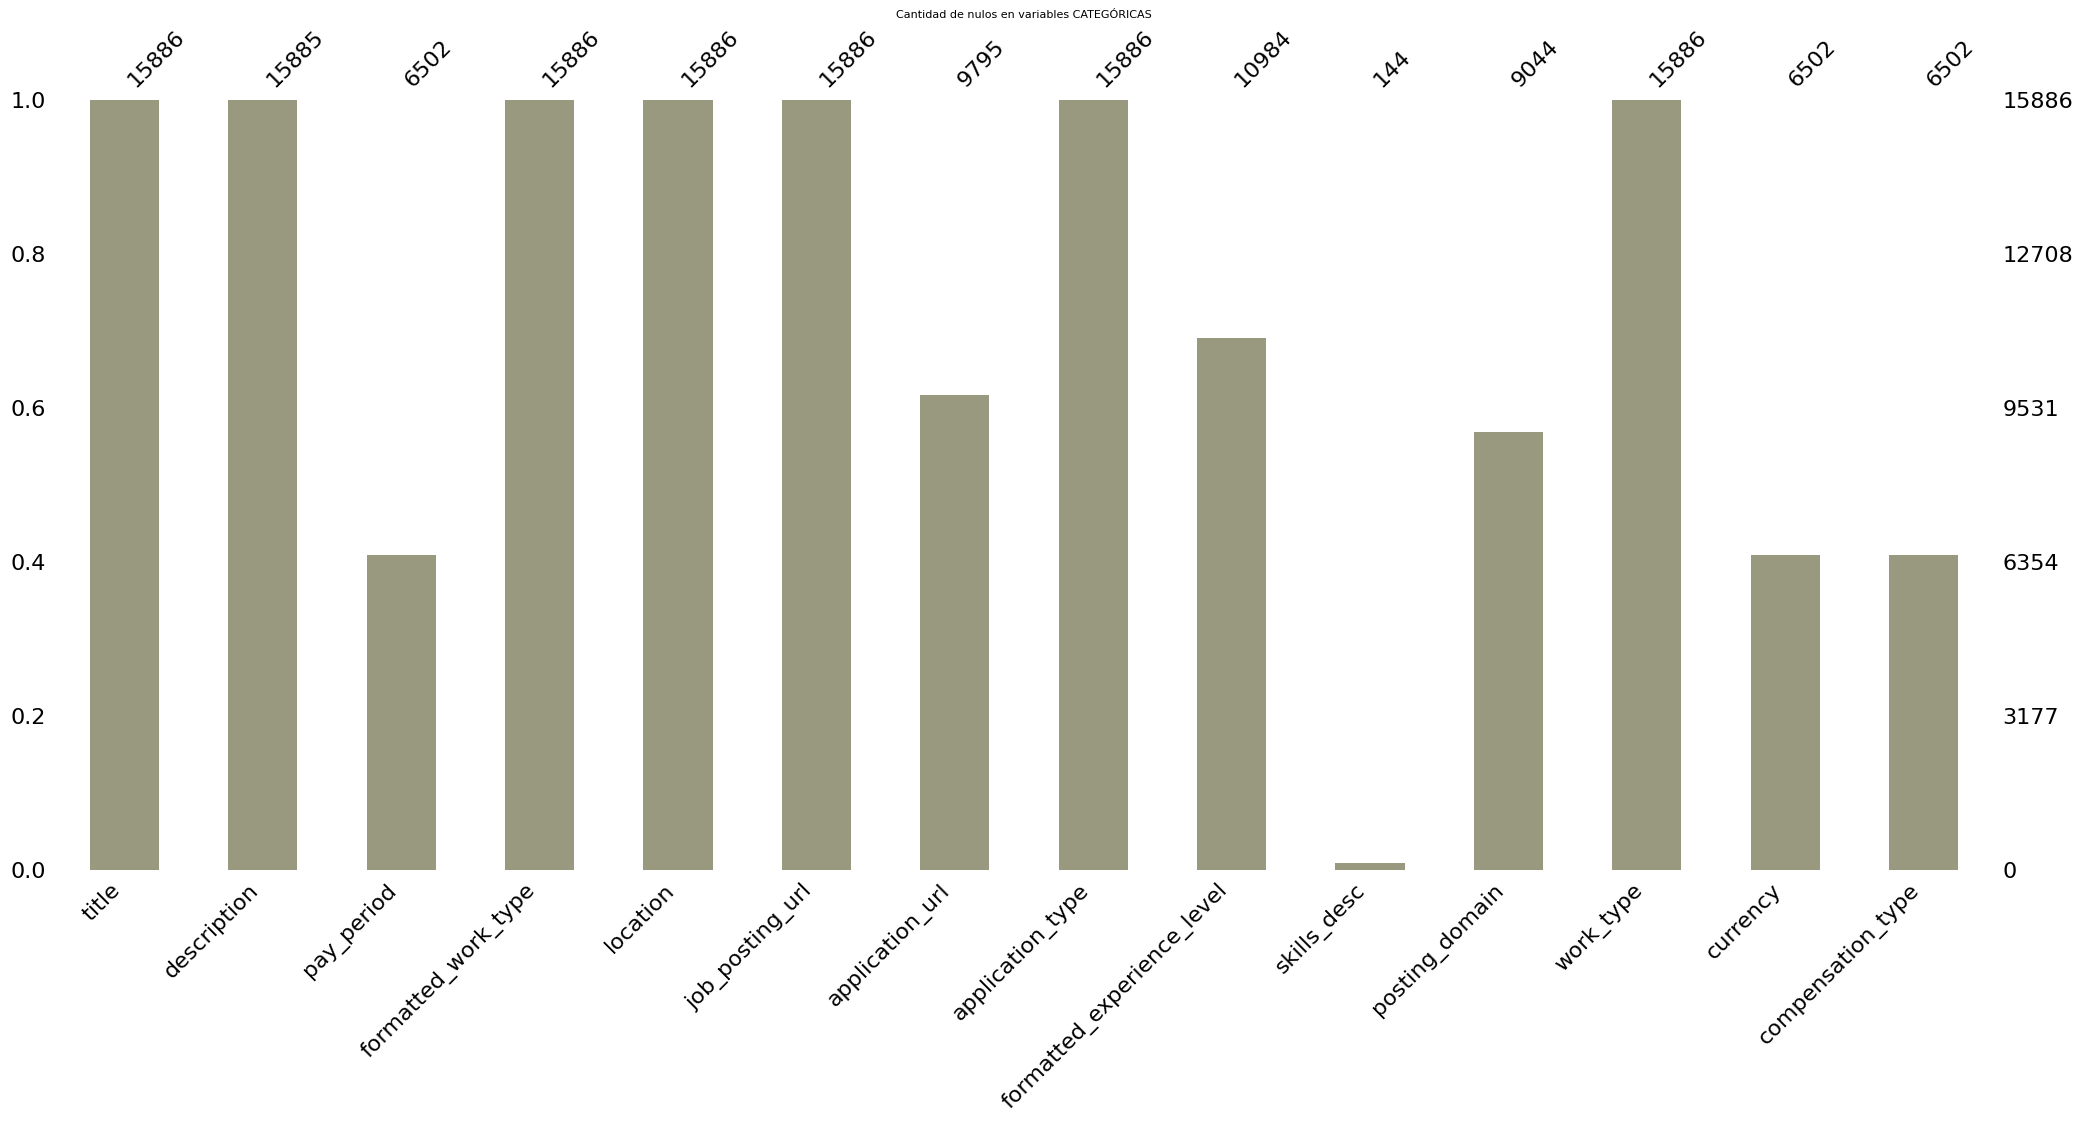

In [ ]:
msno.bar(categoricas, color=(0.6, 0.6, 0.5))
plt.title('Cantidad de nulos en variables CATEGÓRICAS', fontsize=8)
plt.show()



## Tratamiento de Datos Nulos
1. Los datos nulos en las variables normales los reemplazo con la media
2. Los datos nulos en las variables no normales los reemplazo con la mediana
3. Los datos nulos en las variables categoricas los reemplazo con la moda

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

valores = variables_normales.copy() # se crea una copia para no modificar el df variables_normales

# Convertir los nombres de las columnas a cadenas
valores.columns = valores.columns.astype(str)

imputador = SimpleImputer(missing_values=np.nan, strategy='mean') # se define el imputador

transformados = imputador.fit_transform(valores) # transformación del dataset

missing_count = pd.DataFrame(transformados).isnull().sum() # se cuenta el numero de NaN en cada columna

print ('El numero de nulos en cada columna es:')
print (missing_count)


transformados=pd.DataFrame(transformados) # se transforma el array en dataframe


transformados = transformados.rename (columns={0: 'job_id', 1: 'original_listed_time', 2: 'remote_allowed', 3: 'expiry', 4: 'closed_time', 5: 'listed_time'})

variables_normales = transformados.copy()


El numero de nulos en cada columna es:
0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


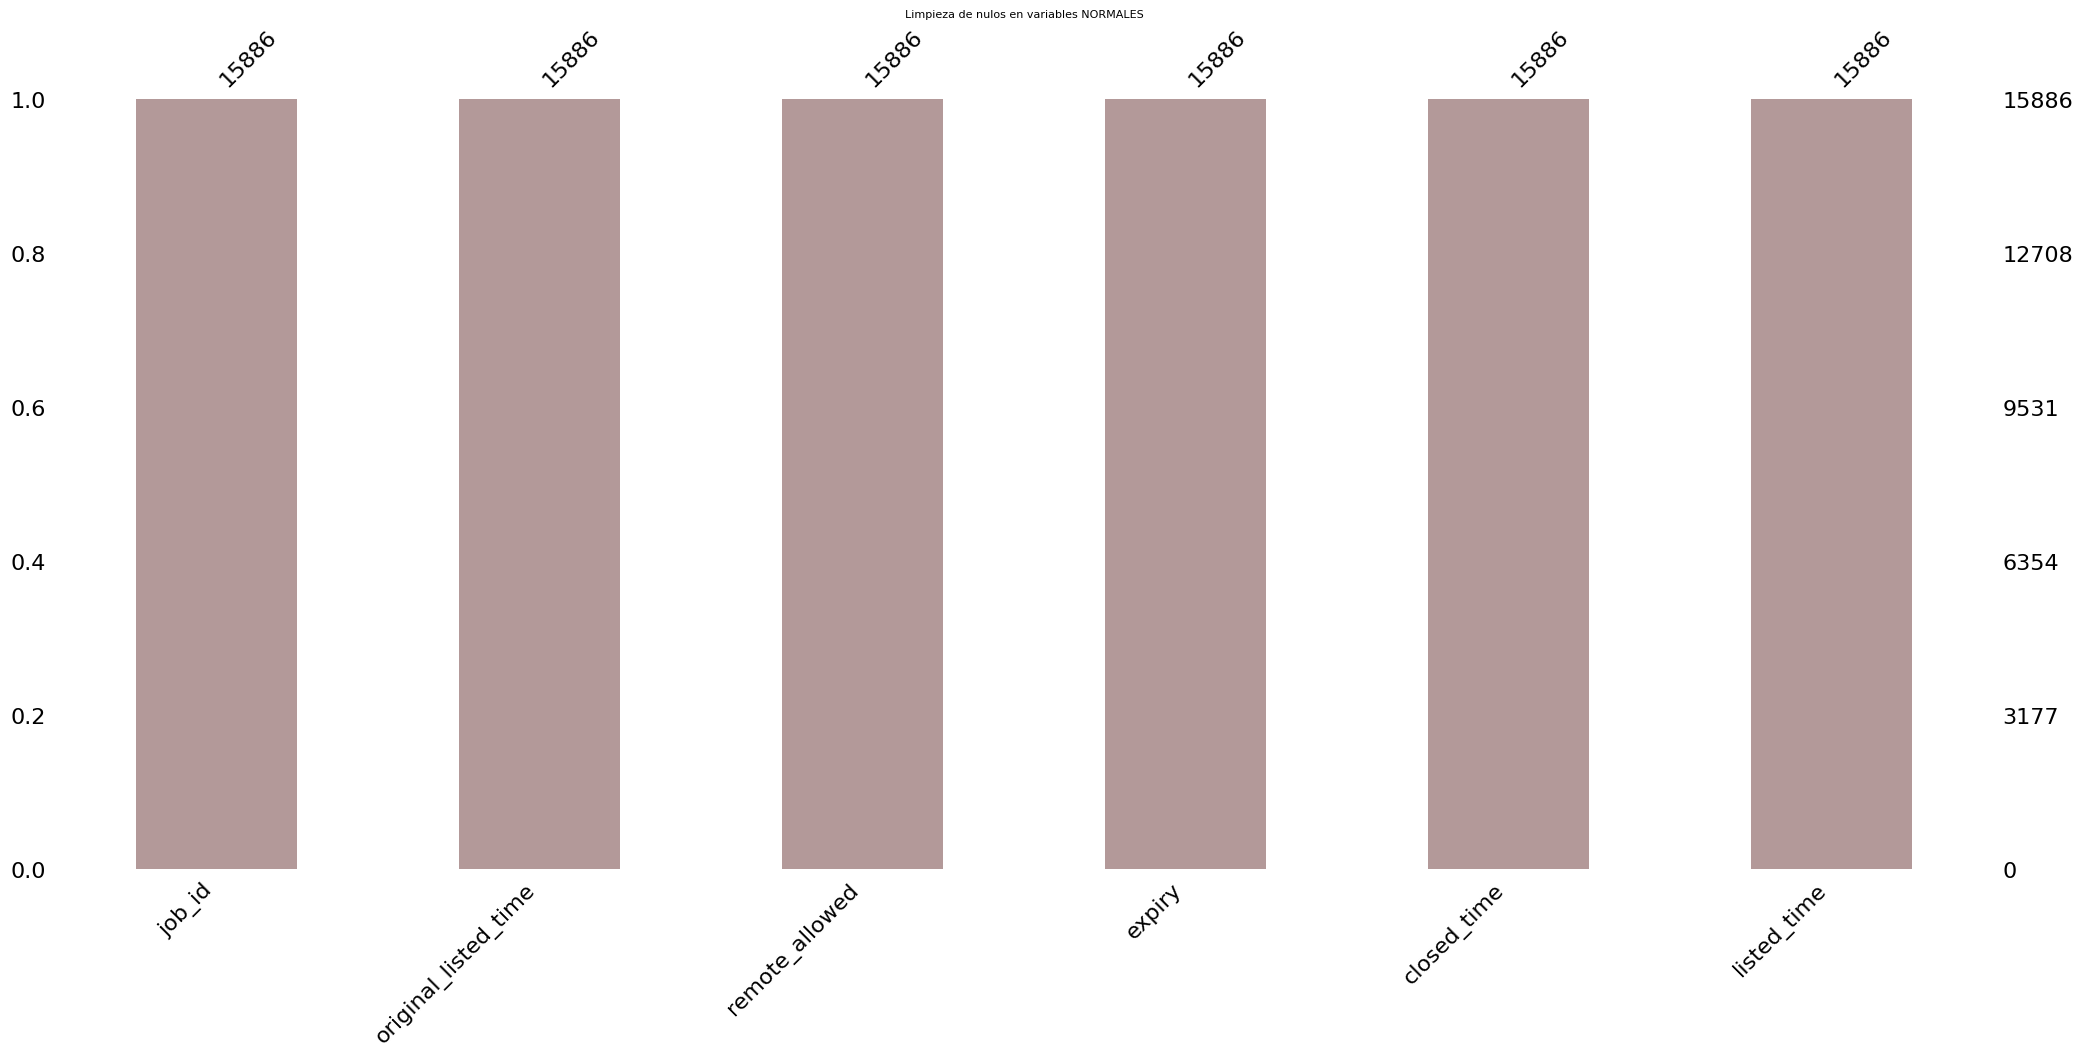

In [ ]:
msno.bar (variables_normales, color=(0.7, 0.6, 0.6))
plt.title ('Limpieza de nulos en variables NORMALES', fontsize=8)
plt.show()

In [ ]:
variables_NO_normales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company_id  15520 non-null  float64
 1   max_salary  5521 non-null   float64
 2   med_salary  981 non-null    float64
 3   min_salary  5521 non-null   float64
 4   applies     8700 non-null   float64
 5   views       13123 non-null  float64
 6   sponsored   15886 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 868.9 KB


In [ ]:
valores = variables_NO_normales.copy()

imputador = SimpleImputer(missing_values=np.nan, strategy='median') #las variables no normales se reemplazan con la mediana

transformados = imputador.fit_transform(valores) # transformacion del dataset


missing_count = pd.DataFrame(transformados).isnull().sum() # Cuenta del numero de NaN en cada columna

print ('El numerco de nulos en cada columna es:')
print (missing_count)


transformados=pd.DataFrame(transformados)
transformados = transformados.rename (columns={0: 'company_id', 1: 'max_salary', 2: 'med_salary', 3: 'mid_salary', 4: 'applies',
       5: 'views', 6: 'sponsored'})

variables_NO_normales = transformados.copy()

El numerco de nulos en cada columna es:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


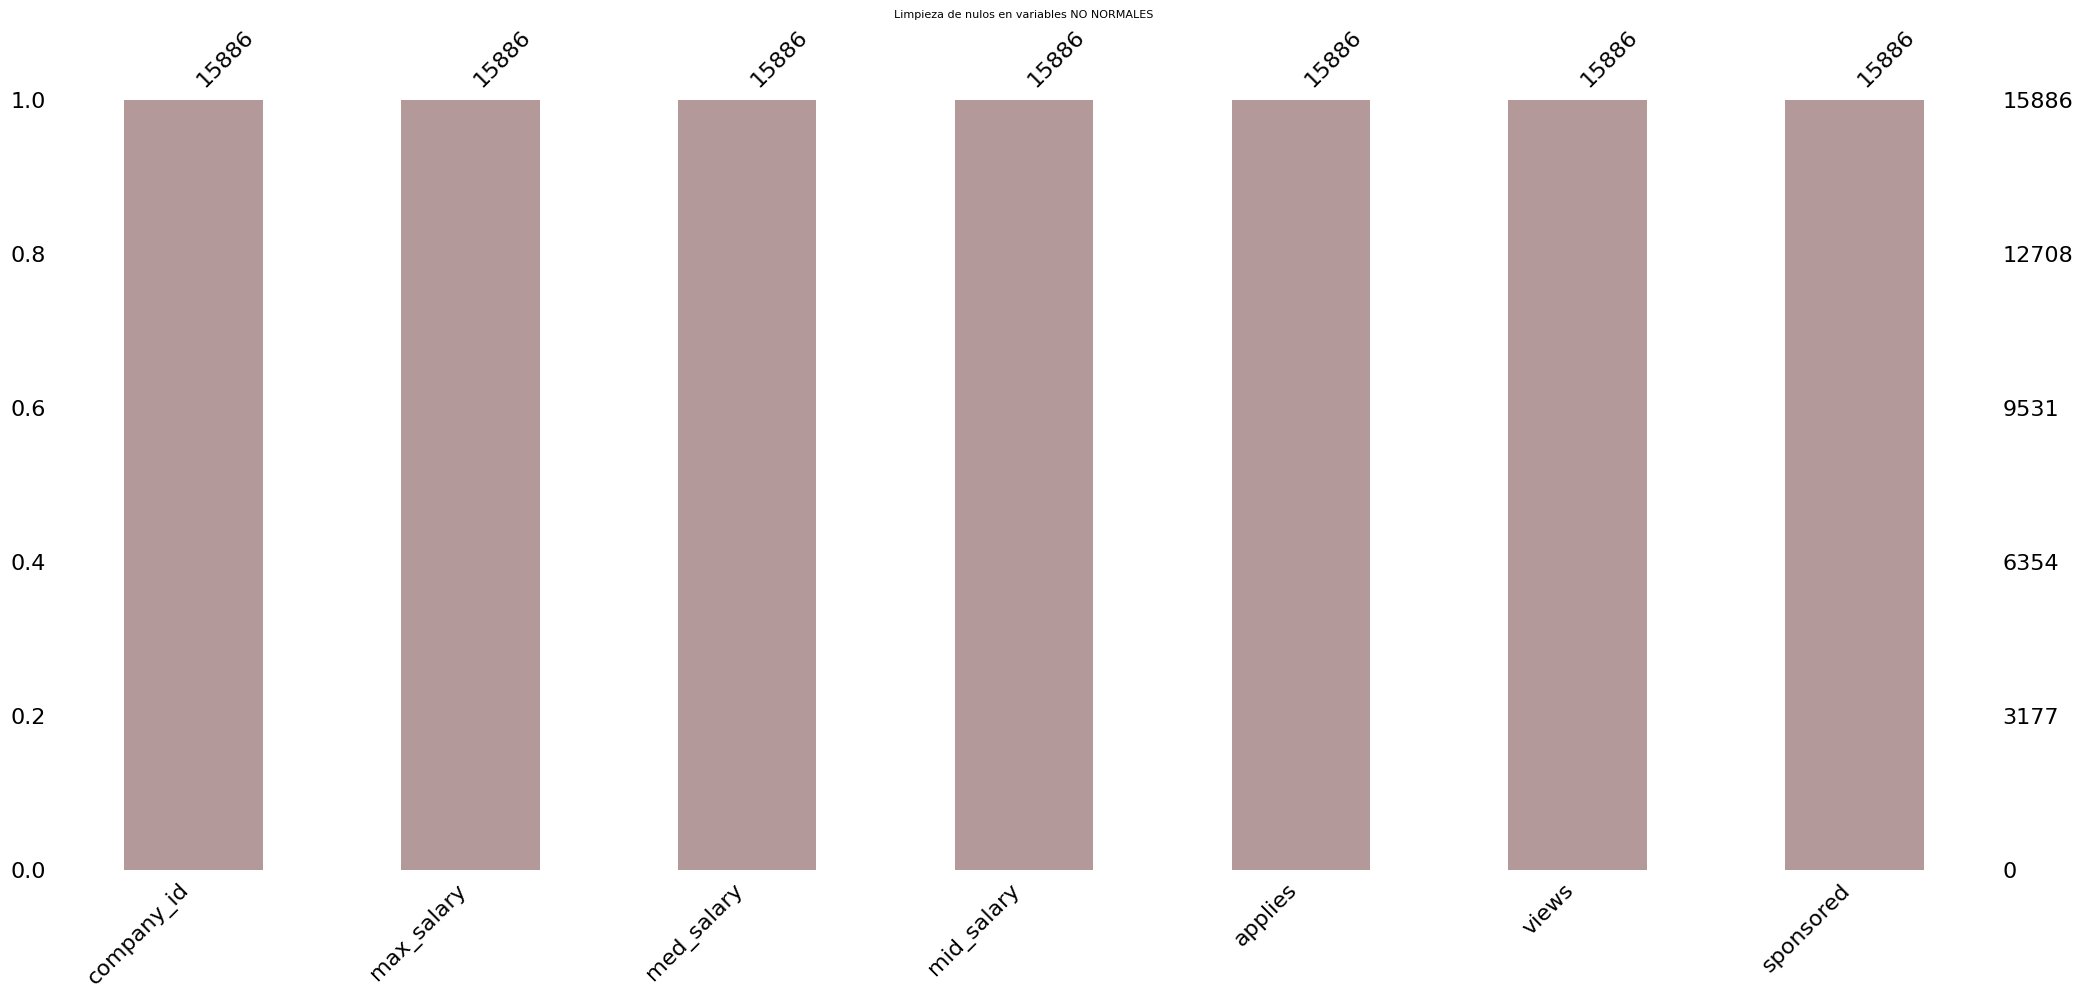

In [ ]:
msno.bar (variables_NO_normales, color=(0.7, 0.6, 0.6))
plt.title ('Limpieza de nulos en variables NO NORMALES', fontsize=8)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

valores = categoricas.copy() # se crea una copia para no modificar el df categoricas

# Convertir los nombres de las columnas a cadenas
valores.columns = valores.columns.astype(str)

imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # se define el imputador

transformados = imputador.fit_transform(valores) # transformación del dataset

missing_count = pd.DataFrame(transformados).isnull().sum() # se cuenta el numero de NaN en cada columna

print ('El numero de nulos en cada columna es:')
print (missing_count)


transformados=pd.DataFrame(transformados) # se transforma el array en dataframe


transformados = transformados.rename (columns={0: 'title', 1: 'description', 2: 'pay_period', 3: 'formatted_work_type', 4: 'location', 5: 'job_posting_url', 6: 'application_url', 7: 'application_type', 8: 'formatted_experience_level', 9: 'skills_desc', 10: 'posting_domain', 11: 'work_type', 12: 'currency', 13: 'compensation_type'})

categoricas = transformados.copy()


El numero de nulos en cada columna es:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


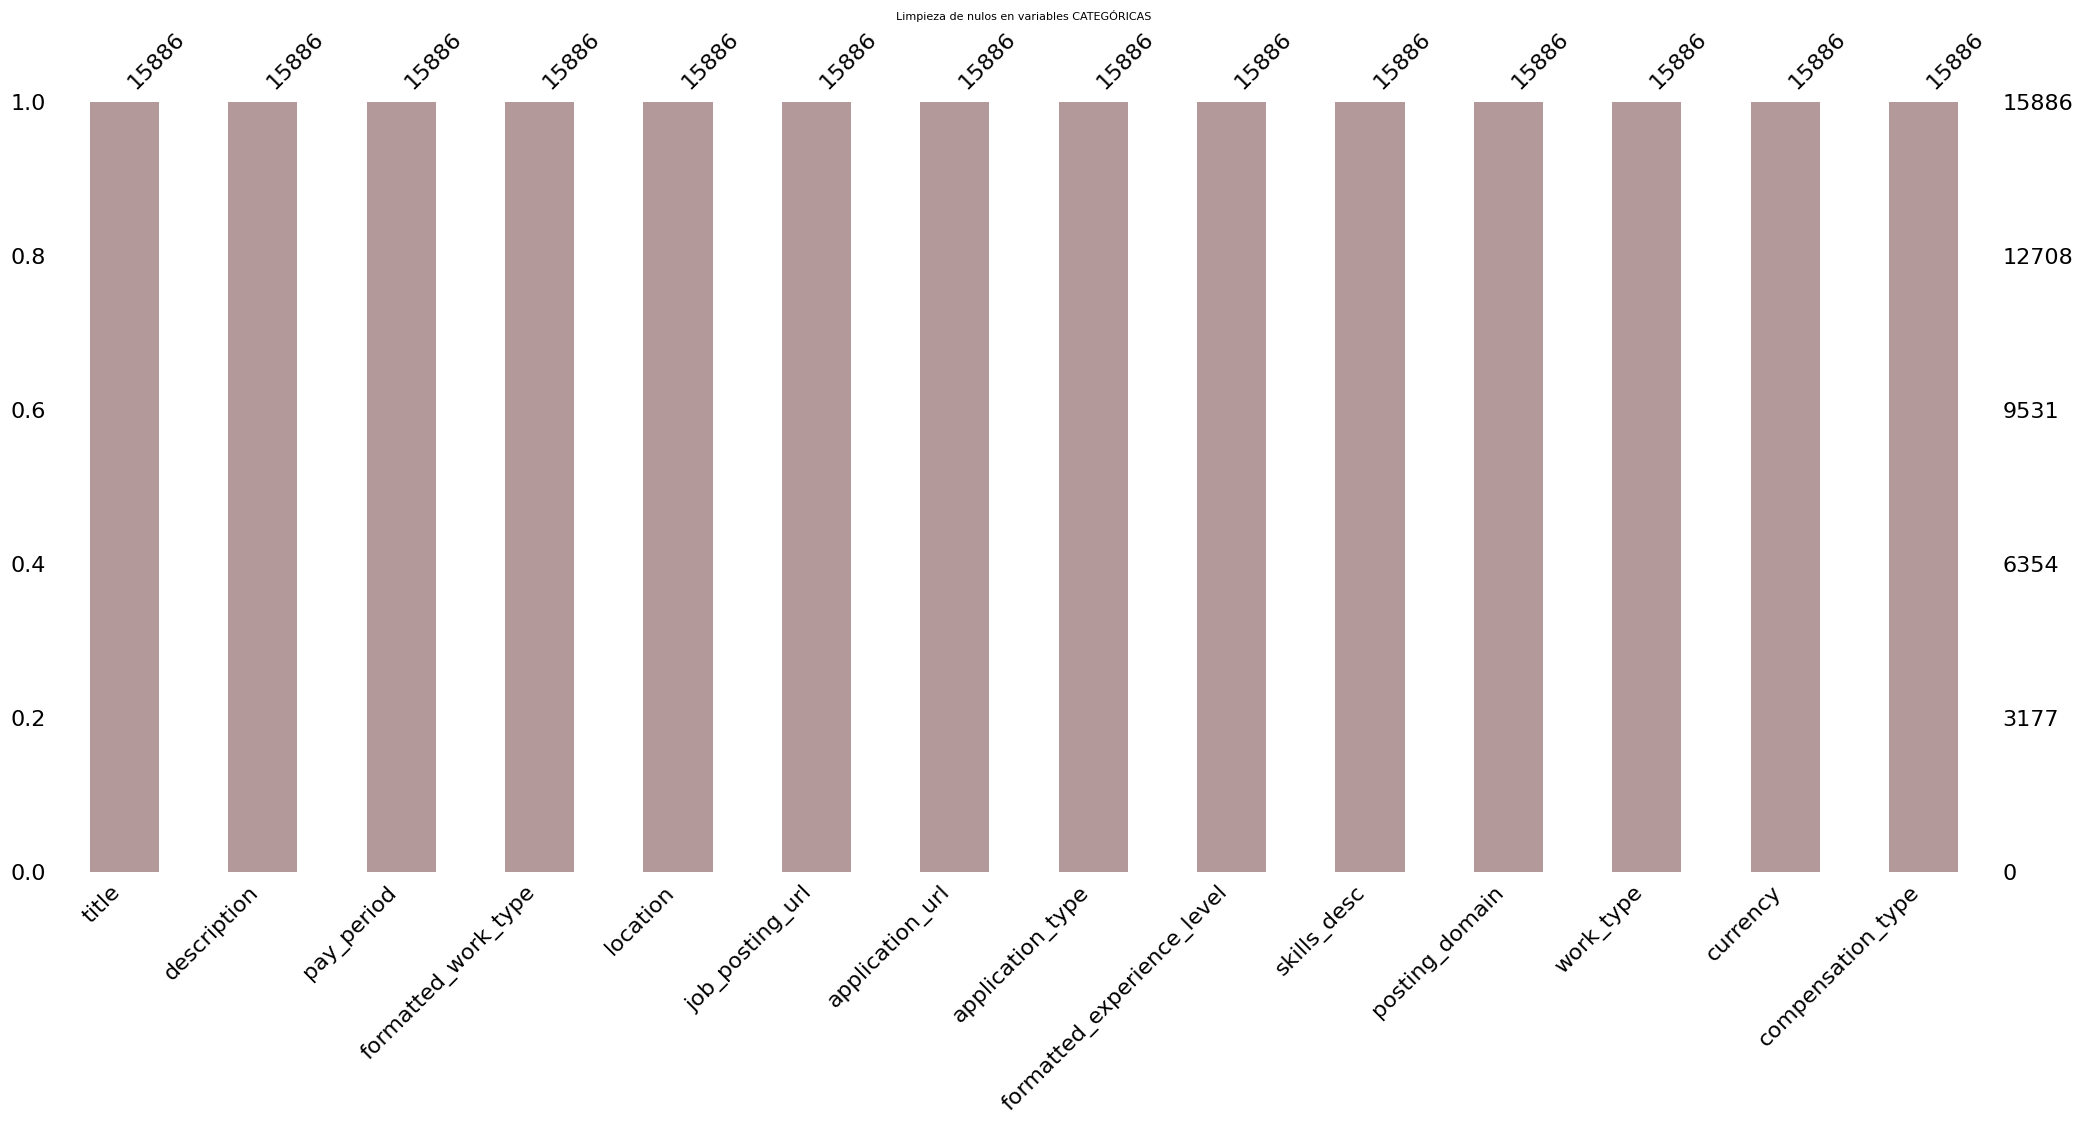

In [ ]:
msno.bar (categoricas, color=(0.7, 0.6, 0.6)) #podemos observar que ya limpiamos los nulos
plt.title ('Limpieza de nulos en variables CATEGÓRICAS', fontsize=8)
plt.show()

## Visualización, identificación y tratamiento de outliers

Cuando la distribución de la variable es normal utilizamos el método z-score

In [ ]:
variables_normales.isnull().sum()

job_id                  0
original_listed_time    0
remote_allowed          0
expiry                  0
closed_time             0
listed_time             0
dtype: int64

In [ ]:
# Ahora que puede normalizar la variable objetivo se debe estandarizar con z-score,
# en caso de no poder normalizar la variable la estandanrización se hace a través de percentiles

# Cálculo de la media y la desviación estándar de las variables_normales

variables_normales_mean = variables_normales.mean(axis=0)
variables_normales_std = variables_normales.std(axis=0)



In [ ]:
# Calculamos el z-score
variables_normales_z = (variables_normales - variables_normales.mean())/variables_normales.std()

# Creamos una variable para marcar los outliers
variables_normales['variables_normales_outliers'] = 0

# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 2.5 o <-2.5
variables_normales.loc[(variables_normales_z > 2.5).any(axis=1) | (variables_normales_z < -2.5).any(axis=1), 'variables_normales_outliers'] = 1



In [ ]:
# Veamos los casos marcados
variables_normales['variables_normales_outliers'].value_counts()


variables_normales_outliers
0    14589
1     1297
Name: count, dtype: int64

- **14549** observaciones no son atípicas (es decir, sus valores z-score están dentro del rango de -2.5 a 2.5).
- **1337** observaciones son atípicas (es decir, sus valores z-score son menores que -2.5 o mayores que 2.5).

Esto significa que la mayoría de los datos se ajustan bien a una distribución normal, pero hay un número significativo de valores atípicos.

REEMPLAZO DE OUTLIERS POR LA MEDIA

In [ ]:
# Ahora, reemplazamos los outliers con la media
for column in variables_normales.columns:
    mean = variables_normales[column].mean()
    variables_normales.loc[variables_normales['variables_normales_outliers'] == 1, column] = mean

Visualización de limpieza de outliers en variables NORMALES

VISUALIZACIÓN DE LA VARIABLE CON OUTLIERS


<ipython-input-39-5bd4408a58e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=variables_normales['job_id'], palette='Set1')


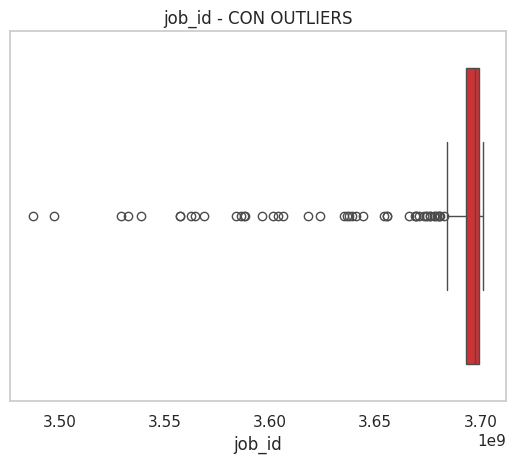

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=variables_normales['job_id'], palette='Set1')
ax.grid(False)
ax.set_title('job_id - CON OUTLIERS')
plt.show()


ASIGNACIÓN DE DATOS SIN OUTLIERS A LAS VARIABLES NORMALES

In [ ]:
# Crear una copia de los datos originales
variables_sin_outliers = variables_normales.copy()

# Identificar y reemplazar los outliers con NaN
for column in variables_sin_outliers.columns:
    mean = variables_sin_outliers[column].mean()
    std = variables_sin_outliers[column].std()
    outliers = (variables_sin_outliers[column] - mean).abs() > 3*std
    variables_sin_outliers.loc[outliers, column] = np.nan

# Ahora, `variables_sin_outliers` contiene solo los datos sin outliers


Visualización de la variables_normales sin outliers


<ipython-input-41-e7e23eeab05a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=variables_sin_outliers['job_id'], palette='Set1')


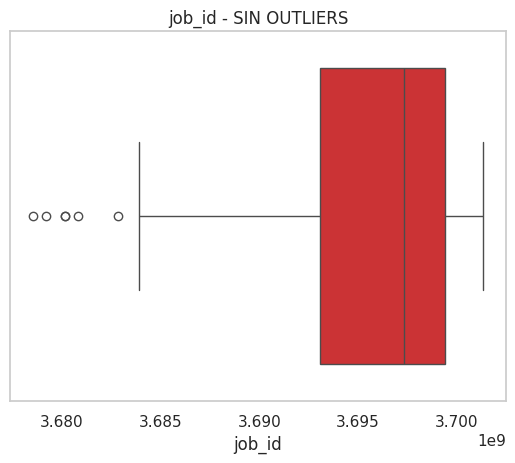

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=variables_sin_outliers['job_id'], palette='Set1')
ax.grid(False)
ax.set_title('job_id - SIN OUTLIERS')
plt.show()


## VARIABLES NO NORMALES - IQR

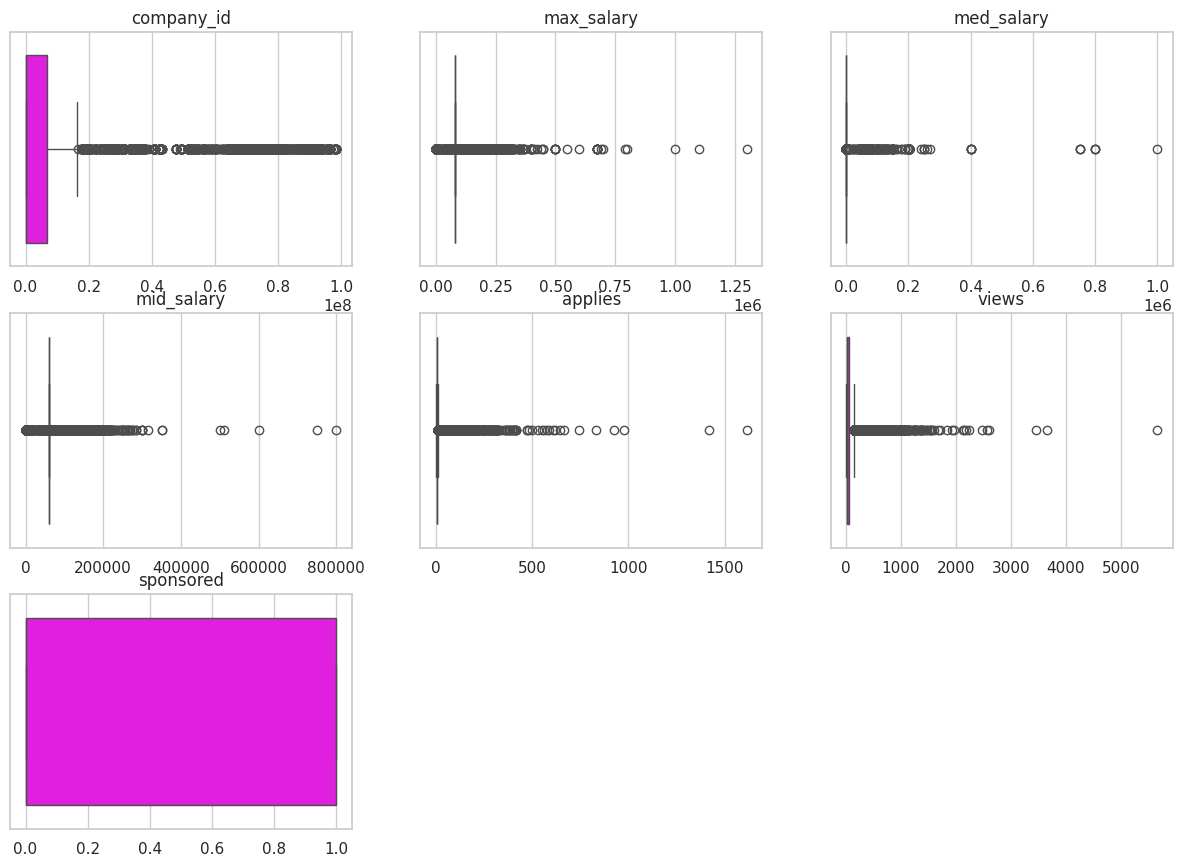

In [ ]:
plt.figure(figsize=(15,14), dpi=100)
for i,j in zip(range(10),variables_NO_normales.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(x=variables_NO_normales[j], color='magenta')
  plt.title(j)
  plt.xlabel('')

Los gráficos de distribuciones muestran que en las variables hay demasiados datos atípicos. Por eso, se toma la decisión de continuar con el modelo sin reemplazar los outliers de las variables_no_normales. Los valores atípicos pueden indicar variabilidad en los datos o errores de medición.

La variable que quiero predecir es “med_salary” que contiene muchos valores atípicos y podría ser que estos valores atípicos representen una variabilidad real en los salarios que es importante para el modelo predictivo. Eliminar estos valores atípicos podría simplificar demasiado el modelo y hacer que sea menos preciso para predecir salarios que son inusualmente altos o bajos.


## PROCESAMIENTO

ENCODEO DE VARIABLES CATEGÓRICAS

In [ ]:
datos_3 = categoricas.copy()
datos_3. tail()

,title,description,pay_period,formatted_work_type,location,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
15881,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",YEARLY,Part-time,"West Columbia, SC",https://www.linkedin.com/jobs/view/3701373516/...,https://aspirebakeriescareers.com/job/West-Col...,OffsiteApply,Entry level,EducationBachelors or better in Education or r...,aspirebakeriescareers.com,PART_TIME,USD,BASE_SALARY
15882,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,YEARLY,Full-time,"Teaneck, NJ",https://www.linkedin.com/jobs/view/3701373522/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,Entry level,EducationBachelors or better in Education or r...,recruiting.ultipro.com,FULL_TIME,USD,BASE_SALARY
15883,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",YEARLY,Part-time,"Teaneck, NJ",https://www.linkedin.com/jobs/view/3701373523/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,Entry level,EducationBachelors or better in Education or r...,recruiting.ultipro.com,PART_TIME,USD,BASE_SALARY
15884,MRI Manager,Grade 105\nJob Type: Officer of Administration...,YEARLY,Full-time,"New York, NY",https://www.linkedin.com/jobs/view/3701373524/...,https://opportunities.columbia.edu/jobs/mri-ma...,OffsiteApply,Mid-Senior level,EducationBachelors or better in Education or r...,opportunities.columbia.edu,FULL_TIME,USD,BASE_SALARY
15885,Area Director of Business Development,Nexion Health Management affiliates operate 56...,YEARLY,Full-time,"Vicksburg, MS",https://www.linkedin.com/jobs/view/3701373527/...,https://jobs.jedunn.com/job/Kansas-City-Genera...,ComplexOnsiteApply,Mid-Senior level,EducationBachelors or better in Education or r...,jobs.smartrecruiters.com,FULL_TIME,USD,BASE_SALARY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for columna in datos_3:
    label_encoder.fit(datos_3[columna])
    datos_3[columna] = label_encoder.transform(datos_3[columna])

datos_3.head()

,title,description,pay_period,formatted_work_type,location,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
0,5136,13331,2,1,487,15883,4589,0,5,108,816,1,0,0
1,8297,1625,2,1,2415,3,4589,0,5,108,816,1,0,0
2,5882,7114,2,0,1907,4,4589,0,5,108,816,0,0,0
3,1335,2388,2,1,896,15881,4589,0,5,108,816,1,0,0
4,5938,13627,2,1,1907,15882,4589,0,5,108,816,1,0,0


In [ ]:
categoricas = datos_3.copy()
categoricas.tail()

,title,description,pay_period,formatted_work_type,location,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
15881,8397,7443,2,4,2850,15876,511,1,2,108,56,4,0,0
15882,10508,6980,2,1,2667,15877,6225,1,2,108,985,1,0,0
15883,7557,6904,2,4,2667,15878,6224,1,2,108,985,4,0,0
15884,5307,4798,2,1,1907,15879,5755,1,5,108,931,1,0,0
15885,573,7948,2,1,2776,15880,4589,0,5,108,816,1,0,0


### ESCALANDO LOS DATOS

VARIABLES NORMALES


In [ ]:
normales = variables_normales.copy()
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()

for columna in normales :
    normales[columna] = scaler_standard.fit_transform(normales[[columna]])


variables_normales = normales.copy()

In [ ]:
variables_normales.head()

,job_id,original_listed_time,remote_allowed,expiry,closed_time,listed_time,variables_normales_outliers
0,-0.8001,0.0,0.0,3.353843,0.0,0.0,3.353843
1,-0.8001,0.0,0.0,3.353843,0.0,0.0,3.353843
2,-0.8001,0.0,0.0,3.353843,0.0,0.0,3.353843
3,-0.8001,0.0,0.0,3.353843,0.0,0.0,3.353843
4,-0.8001,0.0,0.0,3.353843,0.0,0.0,3.353843


VARIABLES NO NORMALES


In [ ]:
no_Normales = variables_NO_normales.copy()
from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()

for columna in no_Normales:
    no_Normales[columna] = scaler_robust.fit_transform(no_Normales[[columna]])

variables_NO_normales = no_Normales.copy()

In [ ]:
variables_NO_normales.head()

,company_id,max_salary,med_salary,mid_salary,applies,views,sponsored
0,0.000000,-30000.0,0.0,-14240.0,0.000000,-0.386473,1.0
1,11.679377,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.122355,0.0,0.0,0.0,-1.666667,-0.154589,0.0
3,14.526203,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.145715,0.0,0.0,0.0,0.000000,-0.444444,1.0


In [ ]:
categoricas.reset_index(drop=True, inplace=True)
variables_normales.reset_index(drop=True, inplace=True)
variables_NO_normales.reset_index(drop=True, inplace=True)

In [ ]:
df_limpio = pd.concat ([categoricas, variables_normales, variables_NO_normales], axis=1)
df_limpio.reset_index(drop=True, inplace=True)
df_limpio.head()

,title,description,pay_period,formatted_work_type,location,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,...,closed_time,listed_time,variables_normales_outliers,company_id,max_salary,med_salary,mid_salary,applies,views,sponsored
0,5136,13331,2,1,487,15883,4589,0,5,108,...,0.0,0.0,3.353843,0.000000,-30000.0,0.0,-14240.0,0.000000,-0.386473,1.0
1,8297,1625,2,1,2415,3,4589,0,5,108,...,0.0,0.0,3.353843,11.679377,0.0,0.0,0.0,0.000000,0.000000,0.0
2,5882,7114,2,0,1907,4,4589,0,5,108,...,0.0,0.0,3.353843,0.122355,0.0,0.0,0.0,-1.666667,-0.154589,0.0
3,1335,2388,2,1,896,15881,4589,0,5,108,...,0.0,0.0,3.353843,14.526203,0.0,0.0,0.0,0.000000,0.000000,0.0
4,5938,13627,2,1,1907,15882,4589,0,5,108,...,0.0,0.0,3.353843,0.145715,0.0,0.0,0.0,0.000000,-0.444444,1.0


Se concatena el dataset de variables categoricas con las numéricas normales y no normales, para tener una base de datos completa como al principio pero limpia de nulos, outliers, encodeada y escalada.

<Axes: >

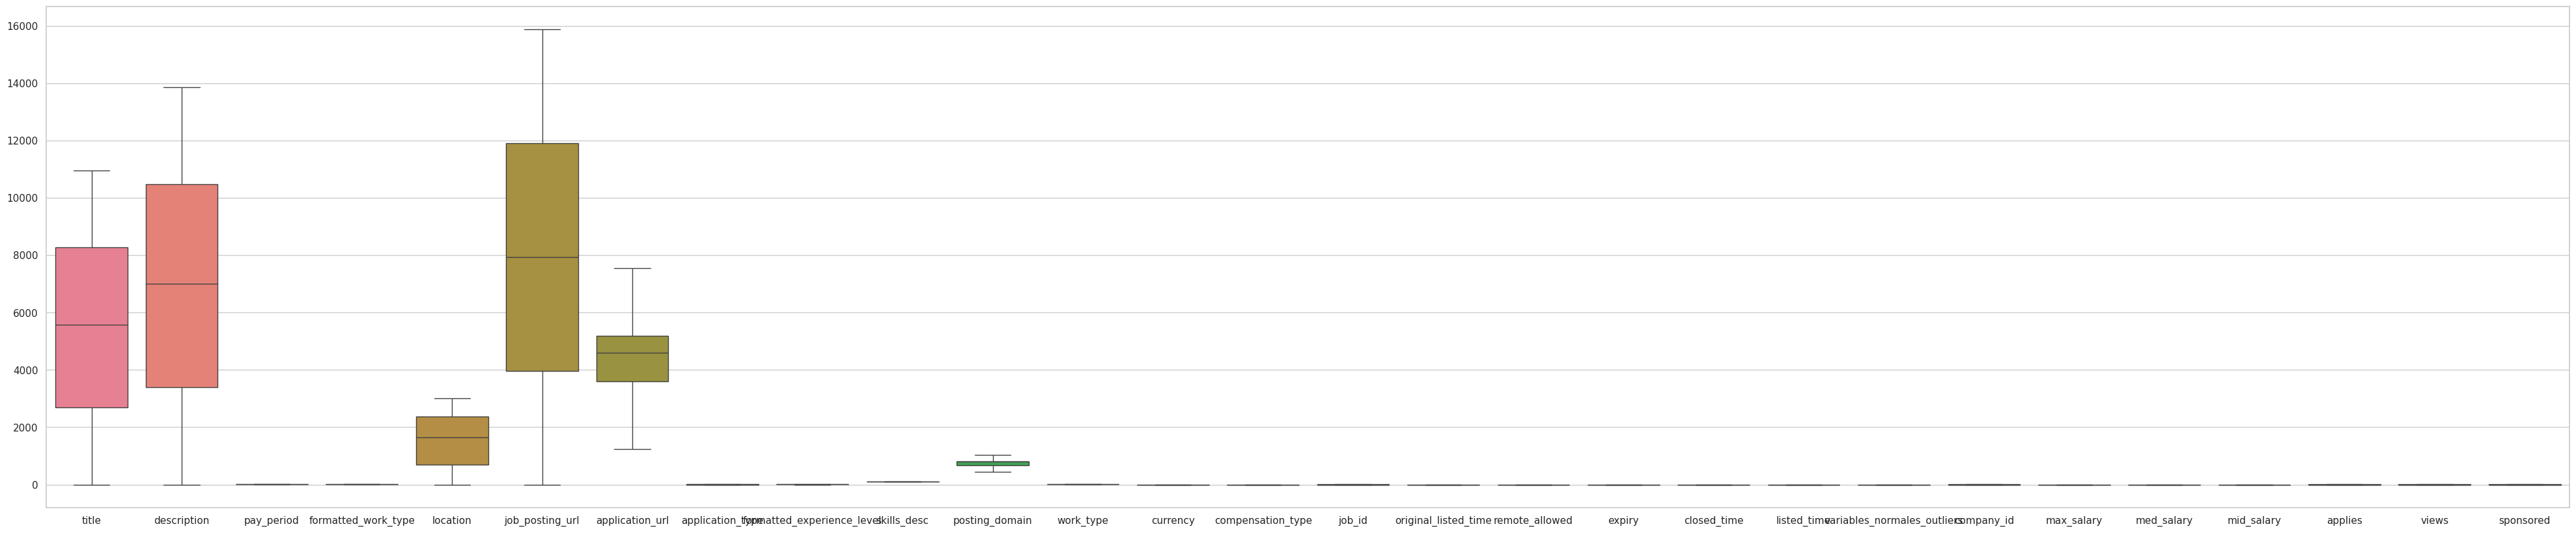

In [ ]:
plt.figure(figsize =(50,10))
sns.boxplot(data= df_limpio, showfliers= False)

### Variable DEPENDIENTE vs INDEPENDIENTE

In [ ]:
X_df = df_limpio.drop('med_salary', axis=1)
Y_df = df_limpio ['med_salary']

La variable que quiero predecir es med_salary que es Y_df

Mapa de Correlaciones

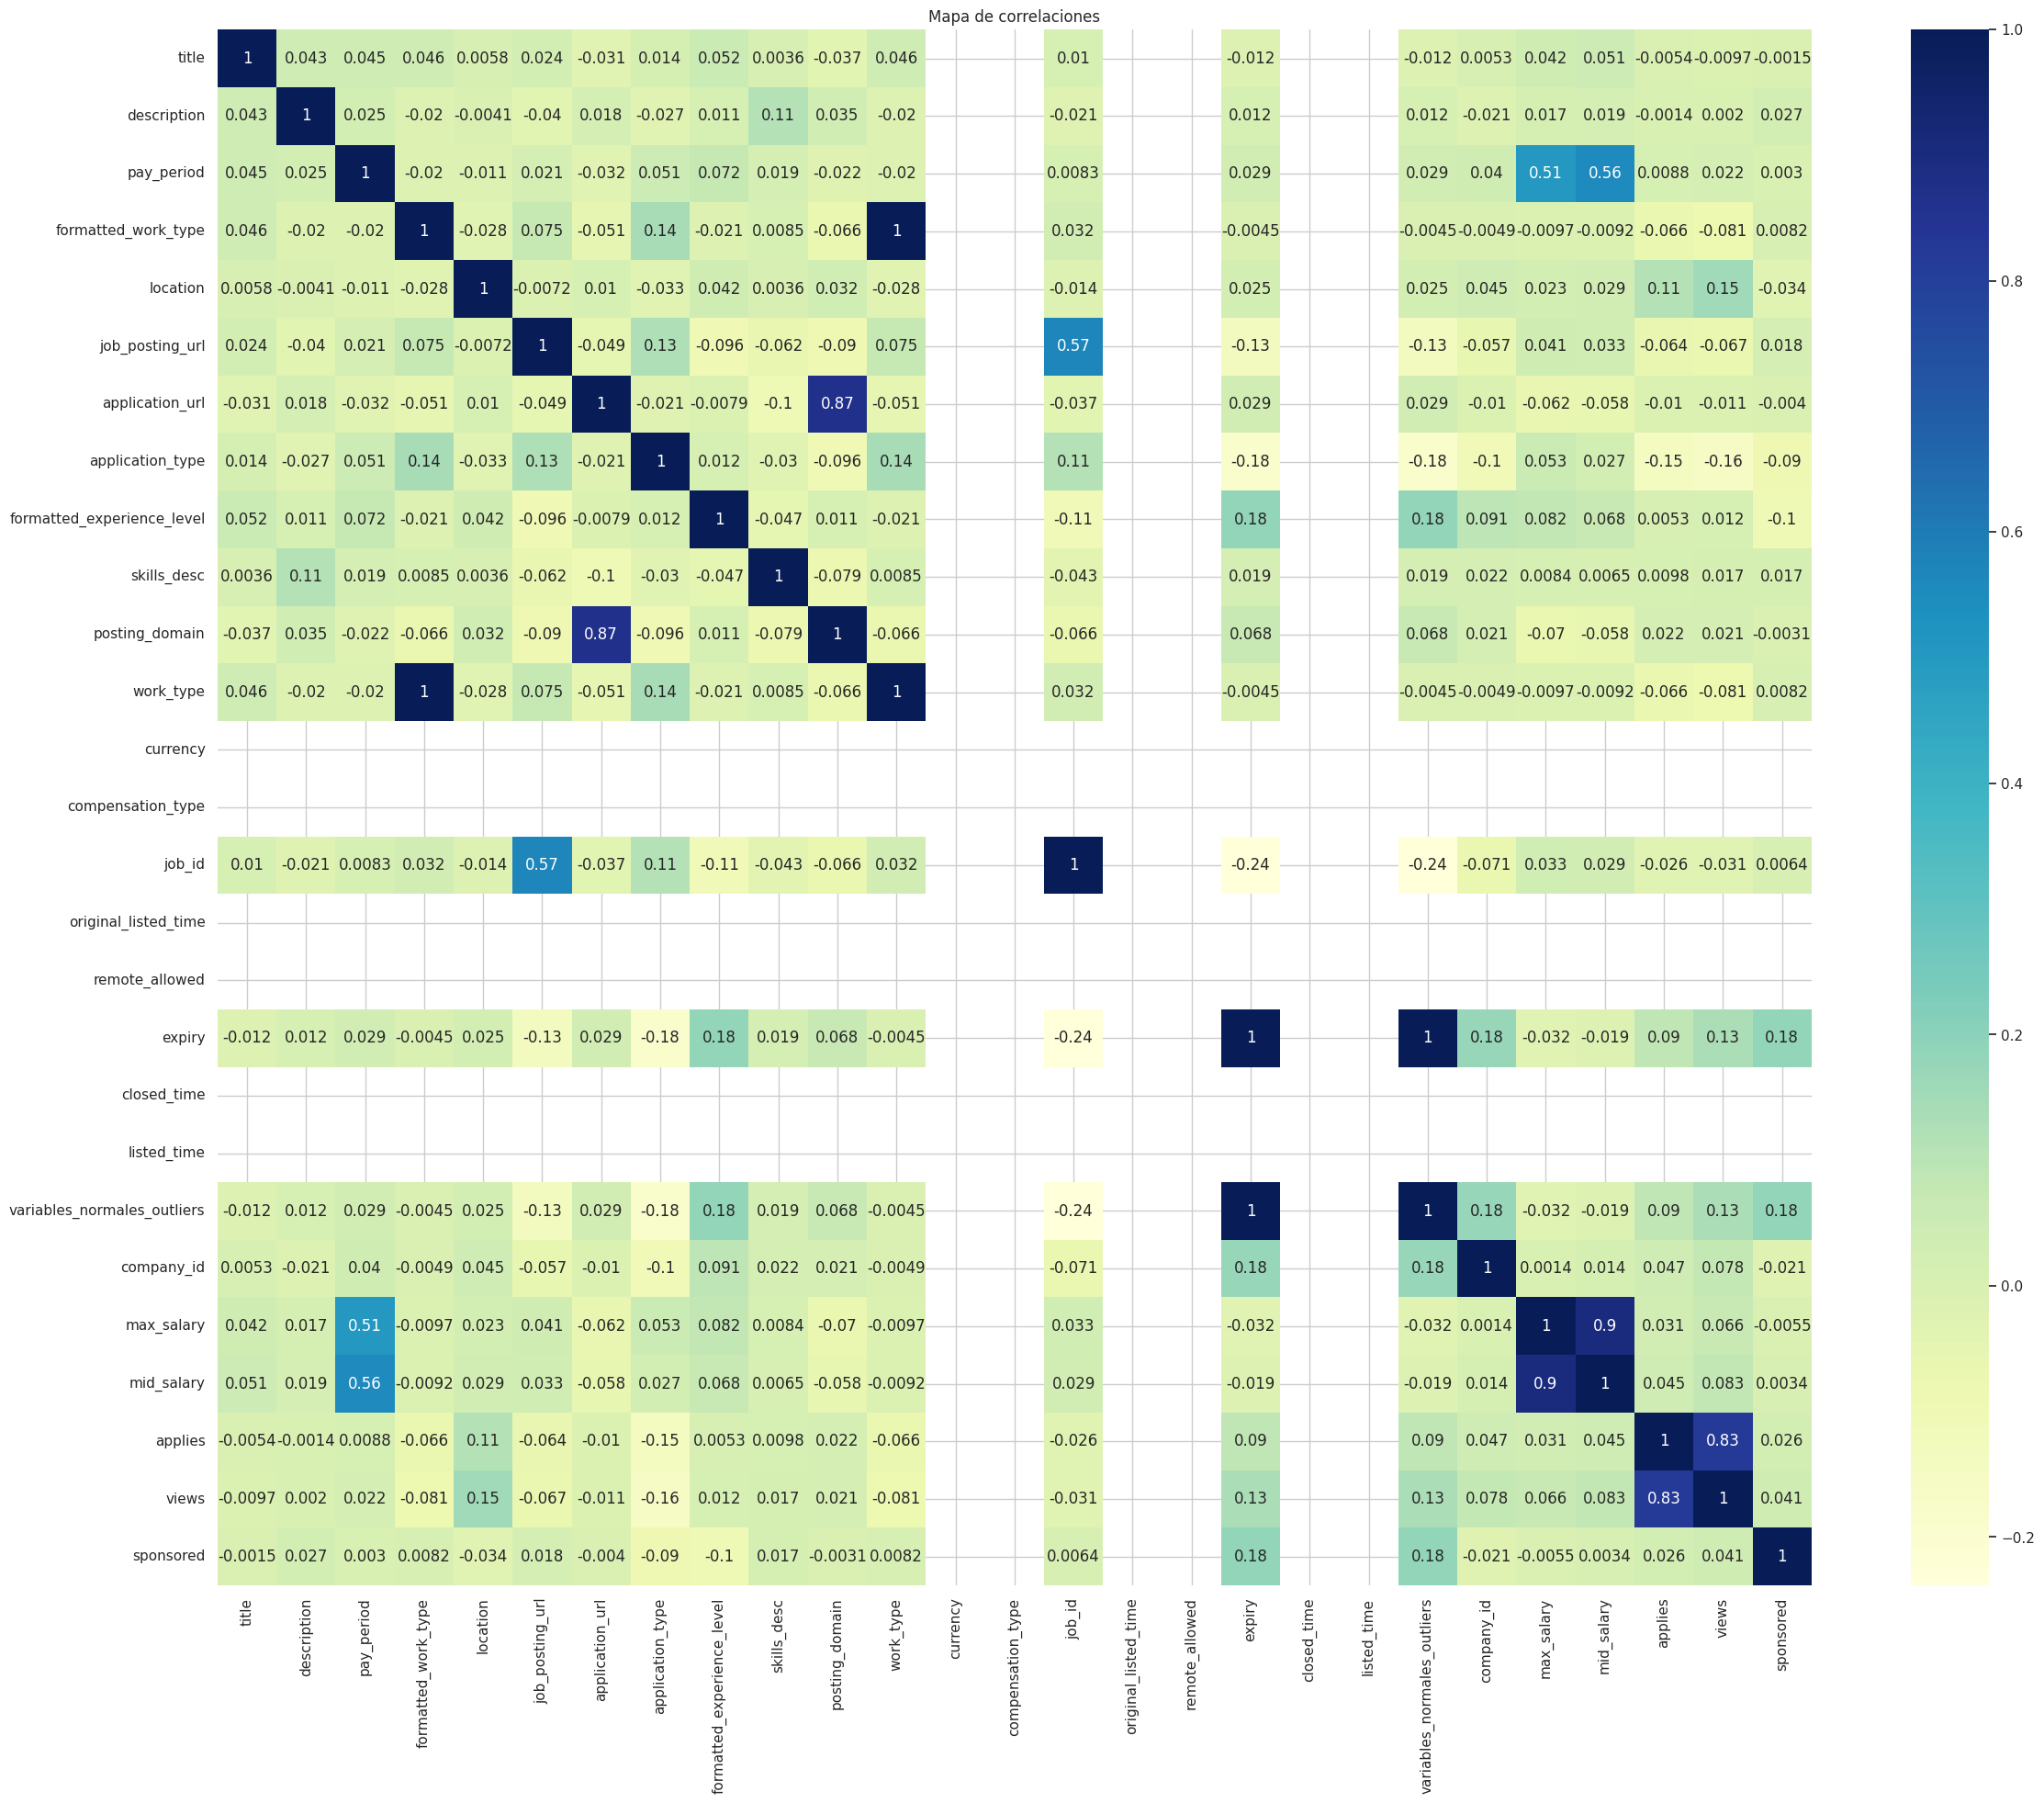

In [ ]:
mapa = X_df.corr()
plt.figure(figsize=(28, 22))
sns.heatmap(mapa,annot=True, cmap="YlGnBu")
plt.title( 'Mapa de correlaciones')
plt.show()

Se observa que hay una correlación entre algunas variables
*   application_url - posting_domain (0.87)
*   max_salary - min_salary (0.9)
*   applies - views (o.83)


Se debe eliminar alguna de estas variables porque no se puede hacer la regresión si hay algunas variables que dependen de otras.



In [ ]:
columnas_a_eliminar = ['posting_domain','max_salary', 'mid_salary', 'views']
X_df.drop(columnas_a_eliminar, axis=1, inplace=True)

Variables de ENTRENAMIENTO vs Variables de PRUEBA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

## Feature Selection

In [ ]:
# Modelo de Arbol de decisión
#Librerias

from sklearn import tree

# Crear el modelo
clf = tree.DecisionTreeRegressor()
# Entrenar el modelo
clf = clf.fit(X_train, y_train)


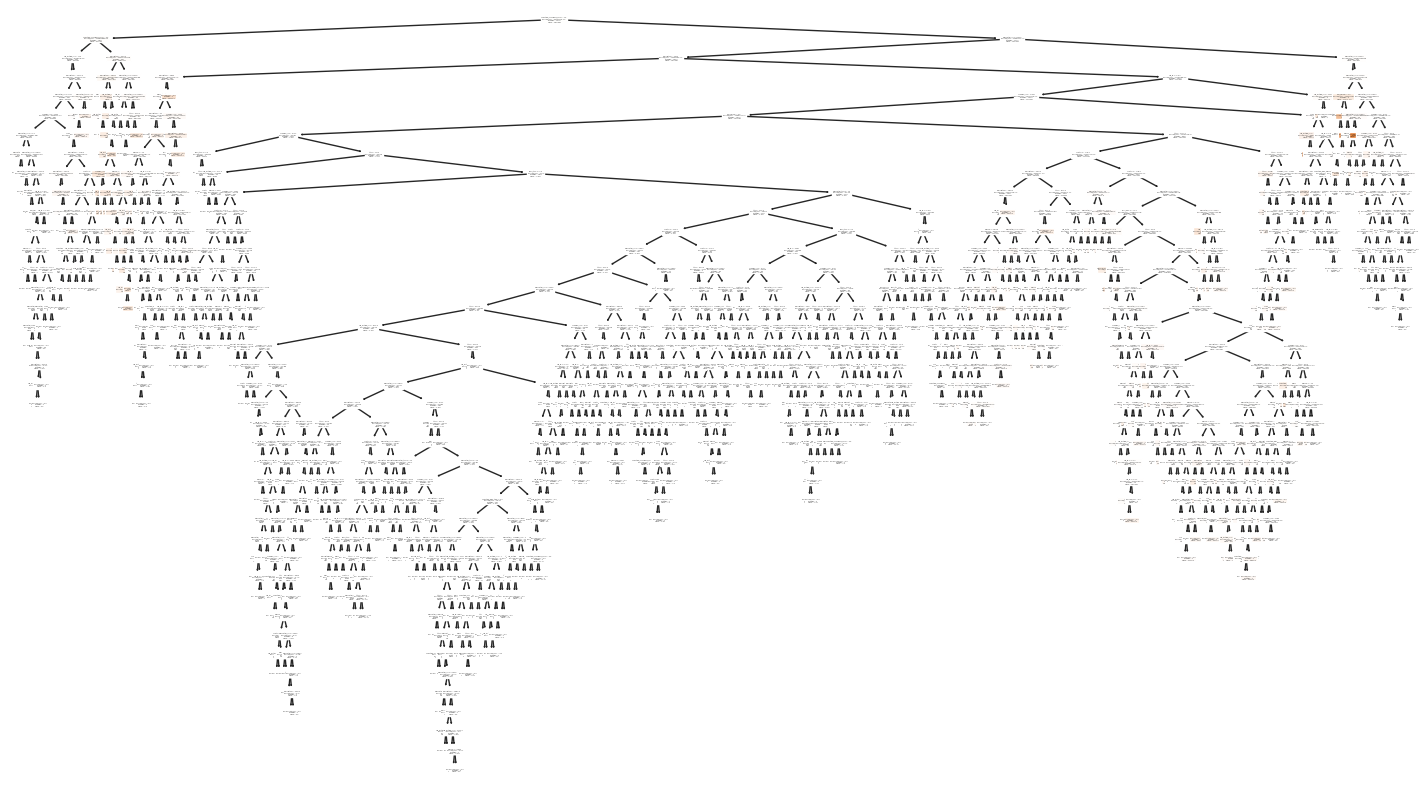

In [ ]:
# Graficando
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,  #1°modelo, 2°nombre de las variables de X
                   class_names=y_train.unique(),#3°el nombre de las variables que contiene Y
                   filled=True)#para que escriba el criterio de division que uso

In [ ]:
#Modelo de Regresión Lineal
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4, #cantidad de variables que se requieren
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

In [ ]:
sfs.fit(X_train, y_train)
sfs.k_feature_names_     #Lista final de features
#Estas son las variables mas importantes a la hora de hacer la prediccion de visualizaciones.

('description', 'pay_period', 'application_url', 'formatted_experience_level')

In [ ]:
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

## Entrenamiento Modelo de Regresión

In [ ]:
lr = LinearRegression() #creo el modelo

lr.fit(X_train_selected, y_train) # entreno, ajusto el modelo con variables de ENTRENAMIENTO

y_pred = lr.predict(X_test_selected) #predicción sobre la variable de PRUEBA

Métricas de Regresión

R2 - R Cuadrado

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.0032039161497072755


El valor de R2 = 0.0032 indica que el modelo explica solo el 0.32% de la variabilidad en los datos. Esto es extremadamente bajo y sugiere que el modelo no se ajusta bien a los datos.

MAE - Error Absoluto Medio

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5212.178978924731


El Error Absoluto Medio (MAE) es una métrica utilizada para evaluar la calidad de un modelo de regresión. En este caso, el valor del MAE es 5212.18. Esto significa que, en promedio, las predicciones del modelo difieren en aproximadamente 5212.18 unidades del valor real.
Dado que el MAE es bastante alto, es probable que el modelo no esté ajustando bien los datos

In [ ]:
med_salary_range = Y_df.describe()[['min', 'max']]
print("Rango de la variable 'med_salary':")
med_salary_range

Rango de la variable 'med_salary':


min       -16.0
max    998400.0
Name: med_salary, dtype: float64

Este rango representa los valores observados en la variable ‘med_salary’. El valor mínimo negativo podría ser un error o una anomalía en los datos, mientras que el valor máximo indica el salario más alto registrado.

## MSE - Error Cuadrático Medio

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 587757005.6675253


El valor del MSE es 587757005.67.
Esto significa que, en promedio, las predicciones del modelo difieren en aproximadamente 587757005.67 unidades al cuadrado del valor real. Dado que este valor es alto, es probable que el modelo no esté ajustando bien los datos.

In [ ]:
print (Y_df.describe())

count     15886.000000
mean       2540.600074
std       25288.696465
min         -16.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      998400.000000
Name: med_salary, dtype: float64


RMSE - Raíz del Error Cuadrático Medio

In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 24243.700329519117


Esto significa que, en promedio, las predicciones del modelo difieren en aproximadamente 24243.70 unidades del valor real. Dado que este valor es alto, es el modelo no se ajusta bien los datos.

## OPTIMIZACIÓN

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = LinearRegression()

# Definir los hiperparámetros a ajustar
param_grid = {
    'fit_intercept': [True, False]
}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo y encontrar los mejores hiperparámetros
grid_search.fit(X_train_selected, y_train)

# Imprimir los mejores hiperparámetros
print("Best Hyperparameters: ", grid_search.best_params_)


Best Hyperparameters:  {'fit_intercept': True}


## VALIDACIÓN CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_df, Y_df, cv=5, scoring='neg_mean_squared_error')

print("Mean Squared Error (MSE) scores:", -scores)
print("Mean MSE:", -scores.mean())

Mean Squared Error (MSE) scores: [2.59050327e+08 1.51293972e+08 1.24628828e+09 6.38628234e+08
 9.89736132e+08]
Mean MSE: 656999389.3613079


El MSE promedio durante la validación cruzada es mayor que el MSE en el conjunto de entrenamiento, es más probable que el modelo esté sobreajustando los datos de entrenamiento (overfitting). Esto significa que el modelo podría estar capturando detalles específicos del conjunto de entrenamiento que no se generalizan bien a nuevos datos.

In [ ]:
df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_2['Sesgo']=df_2.Actual -df_2.Predicted
df_2['Error_porc']=((df_2.Actual -df_2.Predicted)/df_2.Actual) *100
df_2

,Actual,Predicted,Sesgo,Error_porc
7558,0.0,6899.286778,-6899.286778,-inf
3021,0.0,30.476533,-30.476533,-inf
12205,0.0,2698.470328,-2698.470328,-inf
8542,1.0,3217.191606,-3216.191606,-3.216192e+05
14230,0.0,-624.466678,624.466678,inf
...,...,...,...,...
12505,0.0,5824.822700,-5824.822700,-inf
10115,0.0,561.908768,-561.908768,-inf
1153,0.0,946.742176,-946.742176,-inf
9957,0.0,2939.481542,-2939.481542,-inf


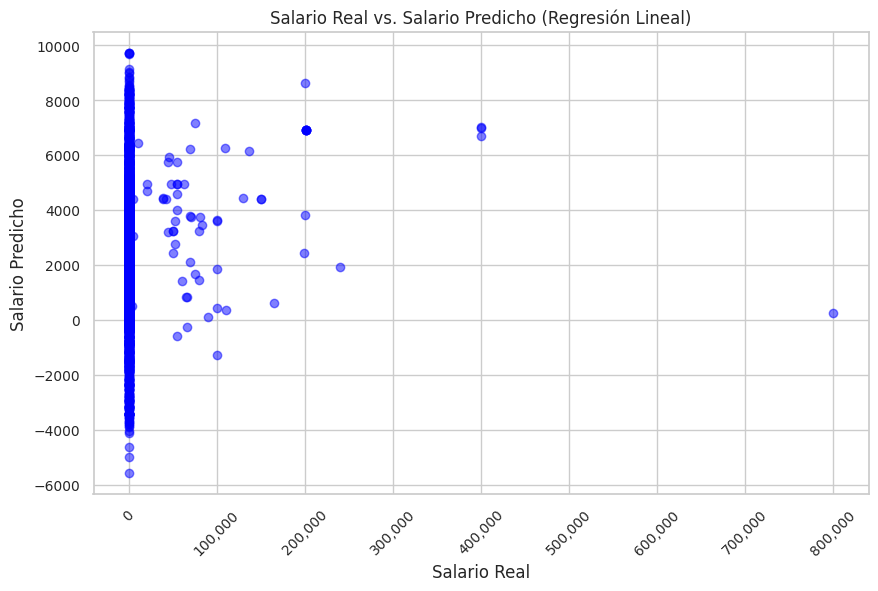

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño del gráfico

# Gráfico de dispersión de valores reales vs. predichos
ax.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Formatea las etiquetas del eje x con separadores de miles y rota las etiquetas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)

# Ajusta el tamaño de la fuente de las etiquetas del eje
plt.tick_params(axis='both', which='major', labelsize=10)

plt.xlabel("Salario Real")
plt.ylabel("Salario Predicho")
plt.title("Salario Real vs. Salario Predicho (Regresión Lineal)")
plt.grid(True)
plt.show()



En términos generales, el modelo parece estar haciendo un buen trabajo al predecir valores cercanos a cero, ya que hay una concentración de puntos cerca del origen del gráfico. Esto indica que las predicciones del modelo son bastante precisas para estos valores.

Sin embargo, para valores más altos, las predicciones del modelo son menos precisas. Esto se evidencia por los puntos que están dispersos lejos del origen del gráfico.

Esto podría indicar que el modelo es bueno para predecir salarios medios bajos pero no tan bueno para predecir salarios medios altos. Podría ser útil investigar por qué esto podría estar ocurriendo. Por ejemplo, podría ser que no haya suficientes datos representativos para los salarios medios altos, o que las características que se estan utilizando para predecir el salario medio no son tan informativas para los salarios más altos.

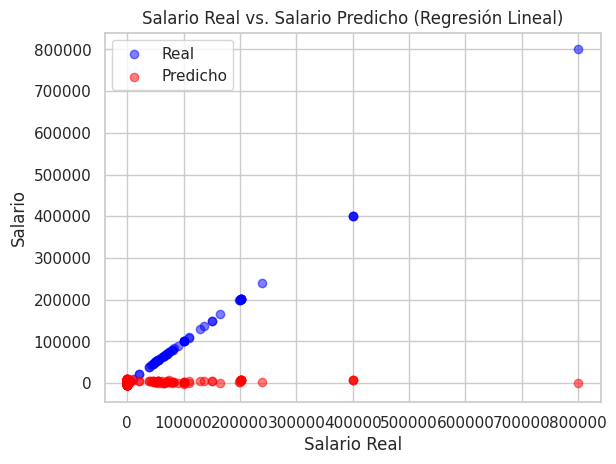

In [ ]:
# Asumiendo que 'y_test' son los valores reales y 'y_pred' son los valores predichos
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Real')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicho')

plt.xlabel("Salario Real")
plt.ylabel("Salario")
plt.title("Salario Real vs. Salario Predicho (Regresión Lineal)")
plt.legend()  # Agrega una leyenda al gráfico
plt.grid(True)
plt.show()


## Re entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear los modelos
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

# Entrenar los modelos
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Hacer predicciones
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Calcular métricas de rendimiento
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)

r21 = r2_score(y_test, y_pred1)
r22 = r2_score(y_test, y_pred2)

# Imprimir las métricas
print("Modelo 1: MSE = {}, MAE = {}, R2 = {}".format(mse1, mae1, r21))
print("Modelo 2: MSE = {}, MAE = {}, R2 = {}".format(mse2, mae2, r22))


Modelo 1: MSE = 585706226.976648, MAE = 5396.609424090187, R2 = 0.006681897948645599
Modelo 2: MSE = 1067042646.6458578, MAE = 3670.9923757079923, R2 = -0.8096320779194583


 El Modelo 1 que es LinearRegression es mejor en términos de MSE y R^2, mientras que el Modelo 2  que es DecisionTreeRegressor es mejor en términos de MAE. Sin embargo, el valor de R^2 para ambos modelos es muy bajo, lo que indica que ninguno de los dos modelos explica bien la variabilidad en los datos.

## Optimización - Hiperparámetros


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Crear los modelos
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

# Definir los hiperparámetros a ajustar
param_grid1 = {
    'fit_intercept': [True, False]
}

param_grid2 = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search1 = GridSearchCV(model1, param_grid1, cv=5)
grid_search2 = GridSearchCV(model2, param_grid2, cv=5)

# Ajustar los modelos y encontrar los mejores hiperparámetros
grid_search1.fit(X_train, y_train)
grid_search2.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Modelo 1 - Mejores hiperparámetros: ", grid_search1.best_params_)
print("Modelo 2 - Mejores hiperparámetros: ", grid_search2.best_params_)


Modelo 1 - Mejores hiperparámetros:  {'fit_intercept': False}
Modelo 2 - Mejores hiperparámetros:  {'max_depth': 5, 'min_samples_split': 5}


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Crear los modelos con los mejores hiperparámetros
model1 = LinearRegression(fit_intercept=False)
model2 = DecisionTreeRegressor(max_depth=5, min_samples_split=5)

# Entrenar los modelos
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Hacer predicciones
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Calcular métricas de rendimiento
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)

r21 = r2_score(y_test, y_pred1)
r22 = r2_score(y_test, y_pred2)

# Imprimir las métricas
print("Modelo 1: MSE = {}, MAE = {}, R2 = {}".format(mse1, mae1, r21))
print("Modelo 2: MSE = {}, MAE = {}, R2 = {}".format(mse2, mae2, r22))


Modelo 1: MSE = 585766440.8814493, MAE = 5395.9791583421575, R2 = 0.006579779243261252
Modelo 2: MSE = 620818039.3272446, MAE = 3932.878551347767, R2 = -0.05286535833324546


Al comparar los resultados de los modelos antes y después del reentrenamiento, podemos observar lo siguiente:

- **Modelo 1 (Regresión Lineal)**: Después del reentrenamiento, el MSE y el MAE son ligeramente más altos, y el R^2 es ligeramente más bajo. Esto sugiere que el rendimiento del modelo no ha cambiado significativamente y sigue siendo bastante pobre, ya que el R^2 es muy cercano a 0.

- **Modelo 2 (Árbol de Decisión)**: Después del reentrenamiento, el MSE ha aumentado, lo que indica que el error cuadrático medio es mayor. Sin embargo, el MAE ha disminuido, lo que sugiere que el error absoluto medio es menor. El R^2 ha aumentado (aunque sigue siendo negativo), lo que indica que el modelo se ajusta mejor a los datos que antes, pero aún así no es un buen ajuste.

En general, parece que ninguno de los modelos está haciendo un buen trabajo al predecir `med_salary`.